# <CENTER> **PROJECT: Advertising Effectiveness Analysis**

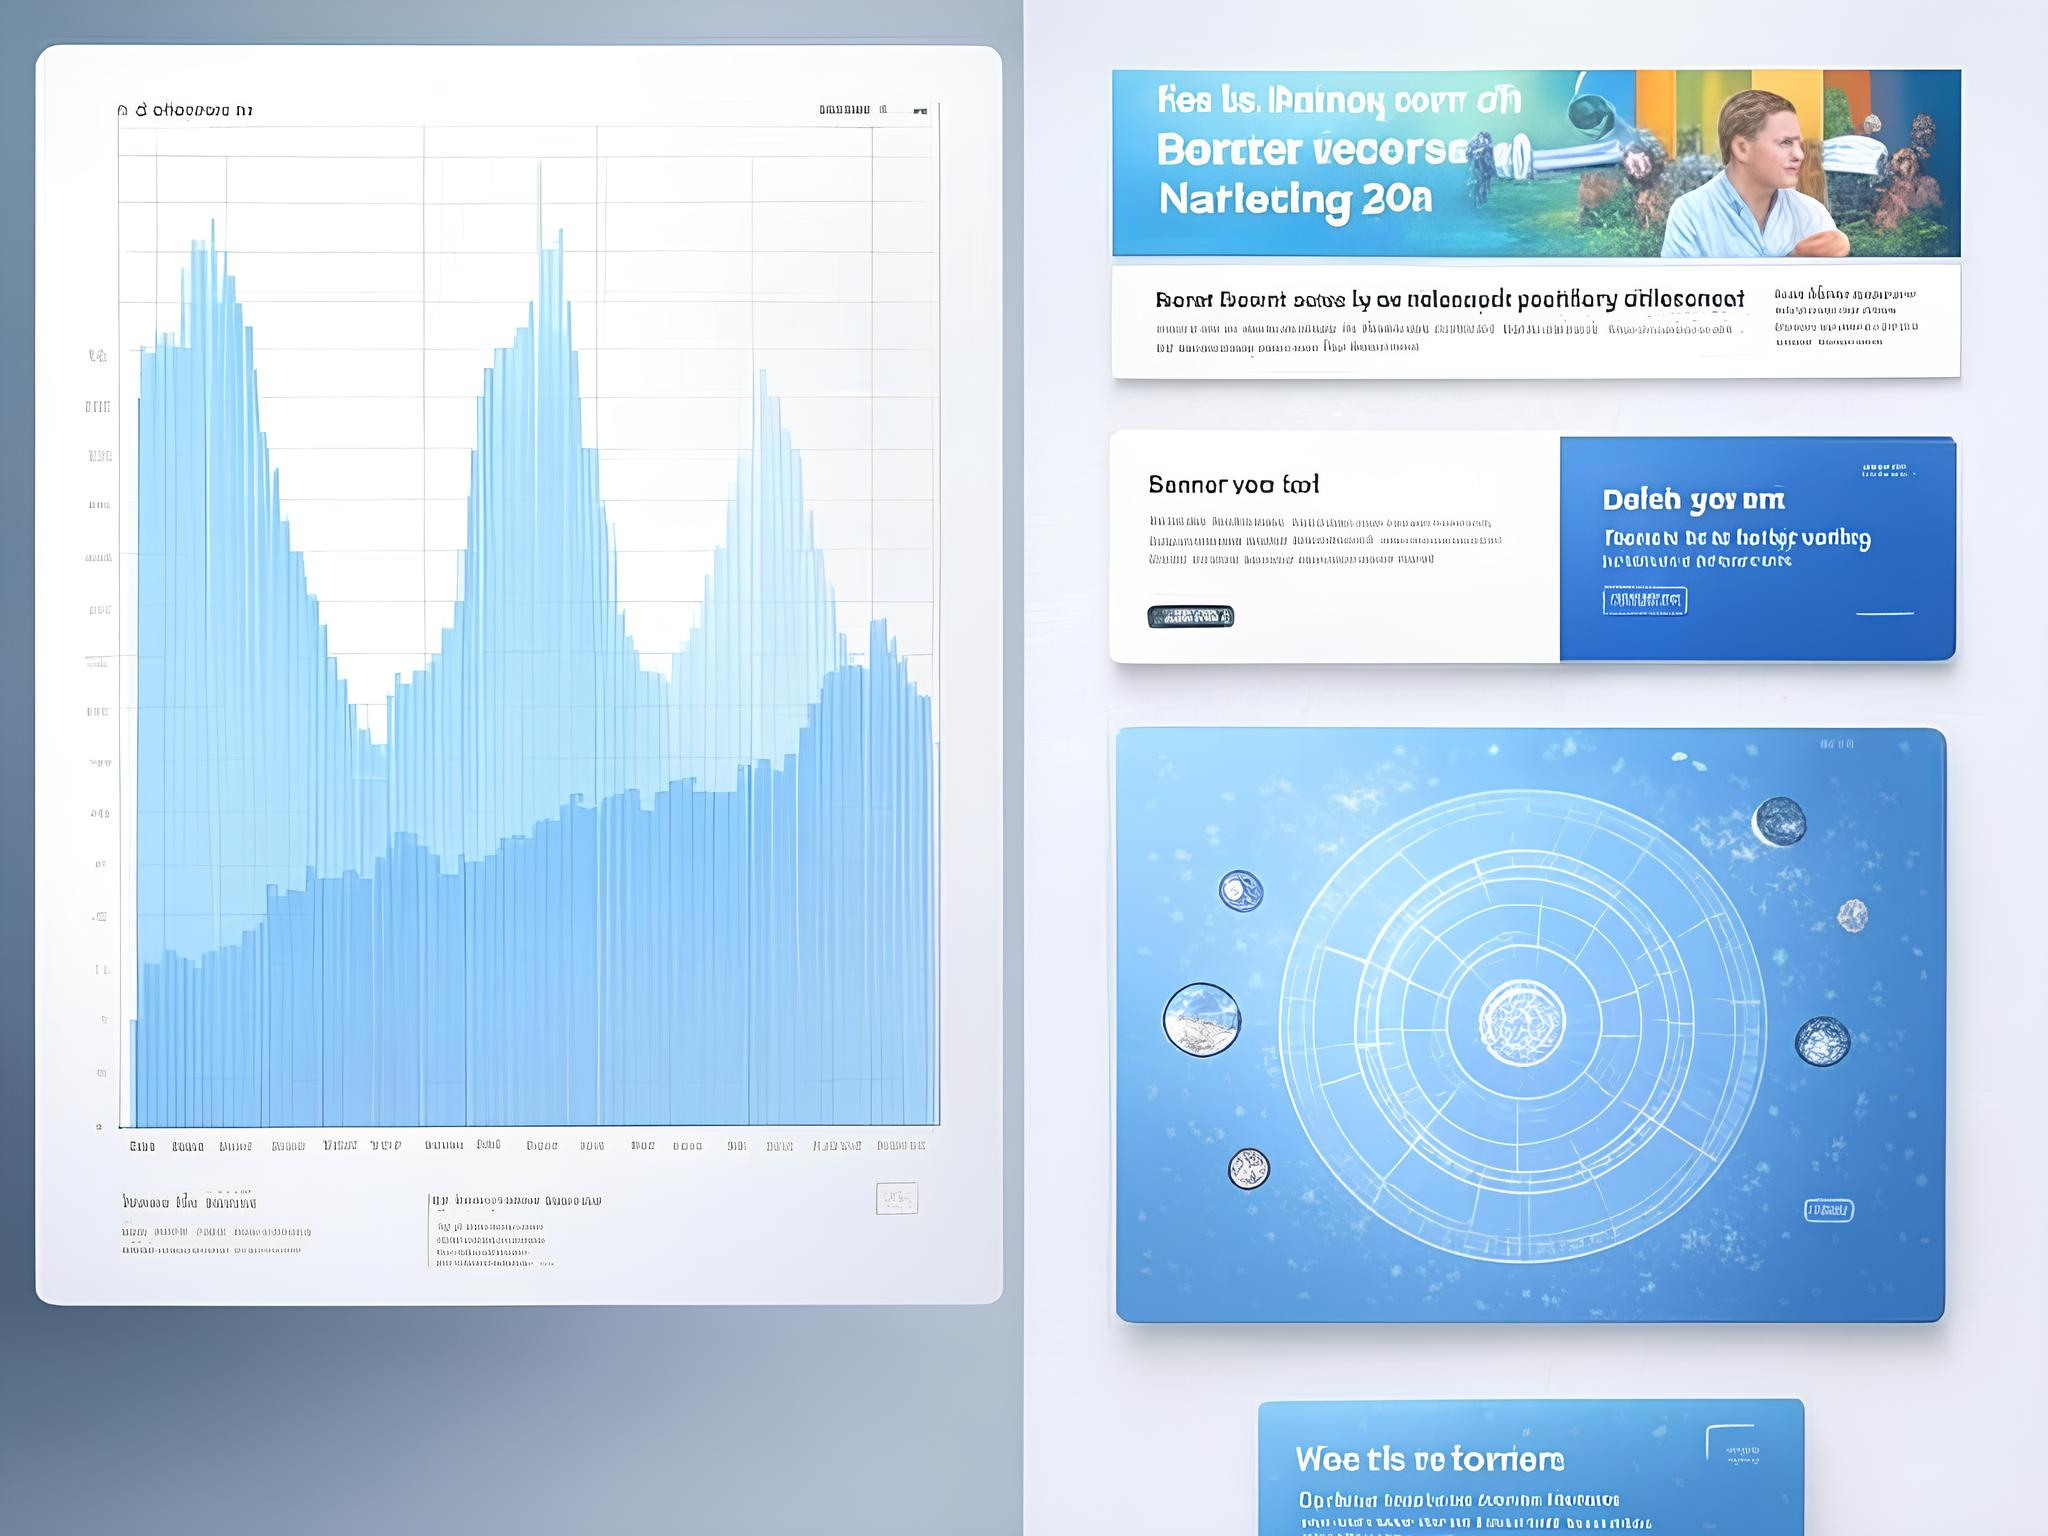

---

#### **Описание:**

Маркетинговые агенства хотят проводить успешные рекламные кампании, но рынок сложен, что требует оценивать эффективности разных вариантов, что обуславливает необходимость проведения АБ-тестирования.

**Компании заинтересованы в ответах на два вопроса:**

1. Будет ли кампания успешной?
2. Если кампания была успешной, насколько этот успех можно объяснить рекламой?

Чтобы ответить на второй вопрос, мы обычно проводим $A/B$ тестирование.

Большинство людей будут видеть рекламу (экспериментальная группа). $А$ небольшая часть людей (контрольная группа) вместо этого увидит объявление государственной службы (PSA) (или ничего) точно такого же размера и в том же месте, где обычно находится реклама.

---


#### **Постановка задачи:**

В данном проекте необходимо проанализировать группы, выяснить, была ли реклама успешной, сколько компания может заработать на рекламе и является ли разница между группами статистически значимой.

---


#### **Основные цели:**

* Сформировать набор данных на основе предоставленных источников информации;

* Проанализировать структуру данных и провести их предобработку;

* Сделать первичный анализ результатов $A/B$-тестирования;

* Провести статистический анализ результатов $A/B$-тестирования.

---


#### **Этапы работы над проектом:**

Проект будет состоять из $5$ частей:

`1.` *Базовый анализ и знакомство с данными*;

`2.` *Очистка данных*;

`3.` *Первичный анализ результатов A/B-тестирования*;

`4.` *Статистический анализ результатов A/B-тестирования*;

`5.` *Общий вывод*.

---

**Импортируем необходимые библиотеки:**

In [ ]:
# Для работы с данными
import numpy as np
import pandas as pd

# Для построения графиков
import seaborn as sns
import matplotlib.pyplot as plt

# Для проведения тестов
from scipy import stats
from statsmodels.stats import proportion

**Загрузка данных:**

In [2]:
# Загружаем DataFrame
AB_marketing_data = pd.read_csv('data/marketing_AB.csv')

# Создаём копию 
AB_marketing_df = AB_marketing_data.copy()

## <CENTER> **`1.` Базовый анализ и знакомство с данными**

На данном этапе изучим информацию предоставленных данных.

#### $1.1$

Выведем информацию по таблице:

In [3]:
# Создадим функцию для вывода информации по датасету
def check_data_inf(data, length1 = None, length2 = None):
    
    # Выводим размеры таблицы
    print('Данные имеют следующую размерность:\n')
    print('Количество строк: {};\nКоличество признаков (столбцов): {}.'.format(data.shape[0], data.shape[1]))
    print('-' * length1)

    # Выведем первые пять строк 
    display(data.head())
    print('-' * length2)
    
    
    
# Выводим информацию по DataFrame при помощи функции 'check_data_inf'
check_data_inf(
    data = AB_marketing_df,
    length1 = 40,
    length2 = 85
)

Данные имеют следующую размерность:

Количество строк: 588101;
Количество признаков (столбцов): 7.
----------------------------------------


,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


-------------------------------------------------------------------------------------


#### **Основные характеристики:**

В данных представлено $6$ признаков:

* `user id`: Идентификатор пользователя (уникальный);

* `test group`: Если *"ad"*, то человек видел рекламу, если *"psa"*, то он видел только объявление государственной службы;

* `converted`: Если человек купил продукт, то *True*, иначе *False*;

* `total ads`: Количество рекламы, увиденной человеком;

* `most ads day`: День, в который человек увидел наибольшее количество рекламы;

* `most ads hour`: Час дня, в который человек увидел наибольшее количество рекламы.

---

#### $1.2$

Выведем информацию по признакам:

In [4]:
# Вывод таблицы
AB_marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


Подсчитаем количество по типам признаков:

In [59]:
# Подсчет количества признаков типа 'object', 'int64' и 'float64'      
object_columns_count = AB_marketing_df.select_dtypes(include = ['object']).shape[1]
int64_columns_count = AB_marketing_df.select_dtypes(include = ['int64']).shape[1]
float64_columns_count = AB_marketing_df.select_dtypes(include = ['float64']).shape[1]
bool_columns_count = AB_marketing_df.select_dtypes(include = ['bool']).shape[1]


# Вывод результата
print('В данных представлены признаки следующих типов:')
print('-' * 50)
print()

print(f"Количество признаков типа 'object': {object_columns_count}")
print(f"Количество признаков типа 'int64': {int64_columns_count}")
print(f"Количество признаков типа 'float64': {float64_columns_count}")
print(f"Количество признаков типа 'bool': {bool_columns_count}")
print('-' * 40)

В данных представлены признаки следующих типов:
--------------------------------------------------

Количество признаков типа 'object': 2
Количество признаков типа 'int64': 3
Количество признаков типа 'float64': 0
Количество признаков типа 'bool': 1
----------------------------------------


#### $1.3$

Выведем описательные характеристики по признакам:

In [6]:
# Вывод таблицы
AB_marketing_df.describe()

,Unnamed: 0,user id,total ads,most ads hour
count,588101.000000,5.881010e+05,588101.000000,588101.000000
mean,294050.000000,1.310692e+06,24.820876,14.469061
std,169770.279668,2.022260e+05,43.715181,4.834634
min,0.000000,9.000000e+05,1.000000,0.000000
25%,147025.000000,1.143190e+06,4.000000,11.000000
50%,294050.000000,1.313725e+06,13.000000,14.000000
75%,441075.000000,1.484088e+06,27.000000,18.000000
max,588100.000000,1.654483e+06,2065.000000,23.000000


## <CENTER> **`2.` Очистка данных**

На данном этапе выявим и очистим данные от пропусков, дубликатов и выбрасов.

#### $2.1$

**Проверим данные на наличие пропусков:**

In [7]:
# Выводим суммарное количество пропусков
print('Суммарное количество пропусков в данных: {} \n'.format(AB_marketing_df.isnull().sum().sum()))
print('-' * 50)

# Выводим признаки с сумрным количеством пропусков
print('Информация по количествам пропусков: \n\n{} \n'.format(AB_marketing_df.isnull().sum()))
print('-' * 50)

# Рассчитываем количество пропусков
cols_null_persent = AB_marketing_df.isnull().mean() * 100
cols_with_null = cols_null_persent[cols_null_persent > 0].sort_values(ascending = False)
print(f'Информация по количествам пропусков в процентах:\n\n{cols_with_null}')
print('-' * 50)

Суммарное количество пропусков в данных: 0 

--------------------------------------------------
Информация по количествам пропусков: 

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64 

--------------------------------------------------
Информация по количествам пропусков в процентах:

Series([], dtype: float64)
--------------------------------------------------


#### $2.2$

**Проверяем данные на наличие дубликатов:**

In [8]:
# Создаём список признаков
dupl_columns = list(AB_marketing_df.columns)


# Создаём маску дубликатов с помощью метода duplicated() и произведём фильтрацию
mask = AB_marketing_df.duplicated(subset = dupl_columns)
train_duplicates = AB_marketing_df[mask]
print(f'Число найденных дубликатов: {train_duplicates.shape[0]}')

Число найденных дубликатов: 0


#### $2.3$

В данных присутствует признак `Unnamed: 0`, который дублирует индексы. Удалим данную переменную из данных, так как она не несёт полезной информации: 

In [12]:
# Удаляем признак 'Unnamed: 0'
AB_marketing_df.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)


# Выводим информацию по DataFrame при помощи функции 'check_data_inf'
check_data_inf(
    data = AB_marketing_df,
    length1 = 40,
    length2 = 75
)

Данные имеют следующую размерность:

Количество строк: 588101;
Количество признаков (столбцов): 6.
----------------------------------------


,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


---------------------------------------------------------------------------


#### $2.4$

Проверим, есть ли пользователи, которые в процессе $A/B$-теста попали в обе группы. Если да, исключим пользователей, оказавшихся в обеих группах:

In [13]:
# Найдем пользователей, которые попали в обе группы,
# для этого сгруппирует данные по 'user id',
# после чего организуем поиск 'user id', у которых больше одной уникальной группы ('ad' и 'psa')
duplicate_users = AB_marketing_df.groupby('user id').filter(lambda x: x['test group'].nunique() > 1)['user id'].unique()


# Выведем количество пользователей, которые в процессе A/B-теста попали в обе группы
print(f'Количество пользователей, попавших в обе группы ("ad" и "psa"): {len(duplicate_users)}')

Количество пользователей, попавших в обе группы ("ad" и "psa"): 0


Таким образом, в данных отсутствуют пользователи, которые находились бы одновременно в обеих группах.

## <CENTER> **`3.` Первичный анализ результатов A/B-тестирования**

На данном этапе рассчитаем вспомогательные показатели для контрольной и тестовой групп, а так же ключевые показатели.

#### $3.1$

**Рассчёт вспомогательных показателей для контрольной и тестовой групп.**

Рассчитаем количество посещений сайта и суммарное количество совершенных покупок:

In [61]:
# Считаем количество посещений (строк) в каждой группе
visits_count = AB_marketing_df.groupby('test group').size()

# Считаем количество покупок в каждой группе
purchases_count = AB_marketing_df.groupby('test group')['converted'].sum()


# Создаем таблицу с результатами
summary_table = pd.DataFrame({
    'Количество посещений': visits_count,
    'Количество покупок': purchases_count
}).reset_index()


# Выводим информацию по DataFrame при помощи функции 'check_data_inf'
check_data_inf(
    data = summary_table,
    length1 = 40,
    length2 = 60
)

Данные имеют следующую размерность:

Количество строк: 2;
Количество признаков (столбцов): 3.
----------------------------------------


,test group,Количество посещений,Количество покупок
0,ad,564577,14423
1,psa,23524,420


------------------------------------------------------------


Построим визуализацию:

------------------------------------------------------------------------------------------------------------------------------------------------------
Коробчатая диаграмма для сравнения параметров распределения ежедневной конверсии по группам.


C:\Users\User\AppData\Local\Temp\ipykernel_6512\2998987851.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


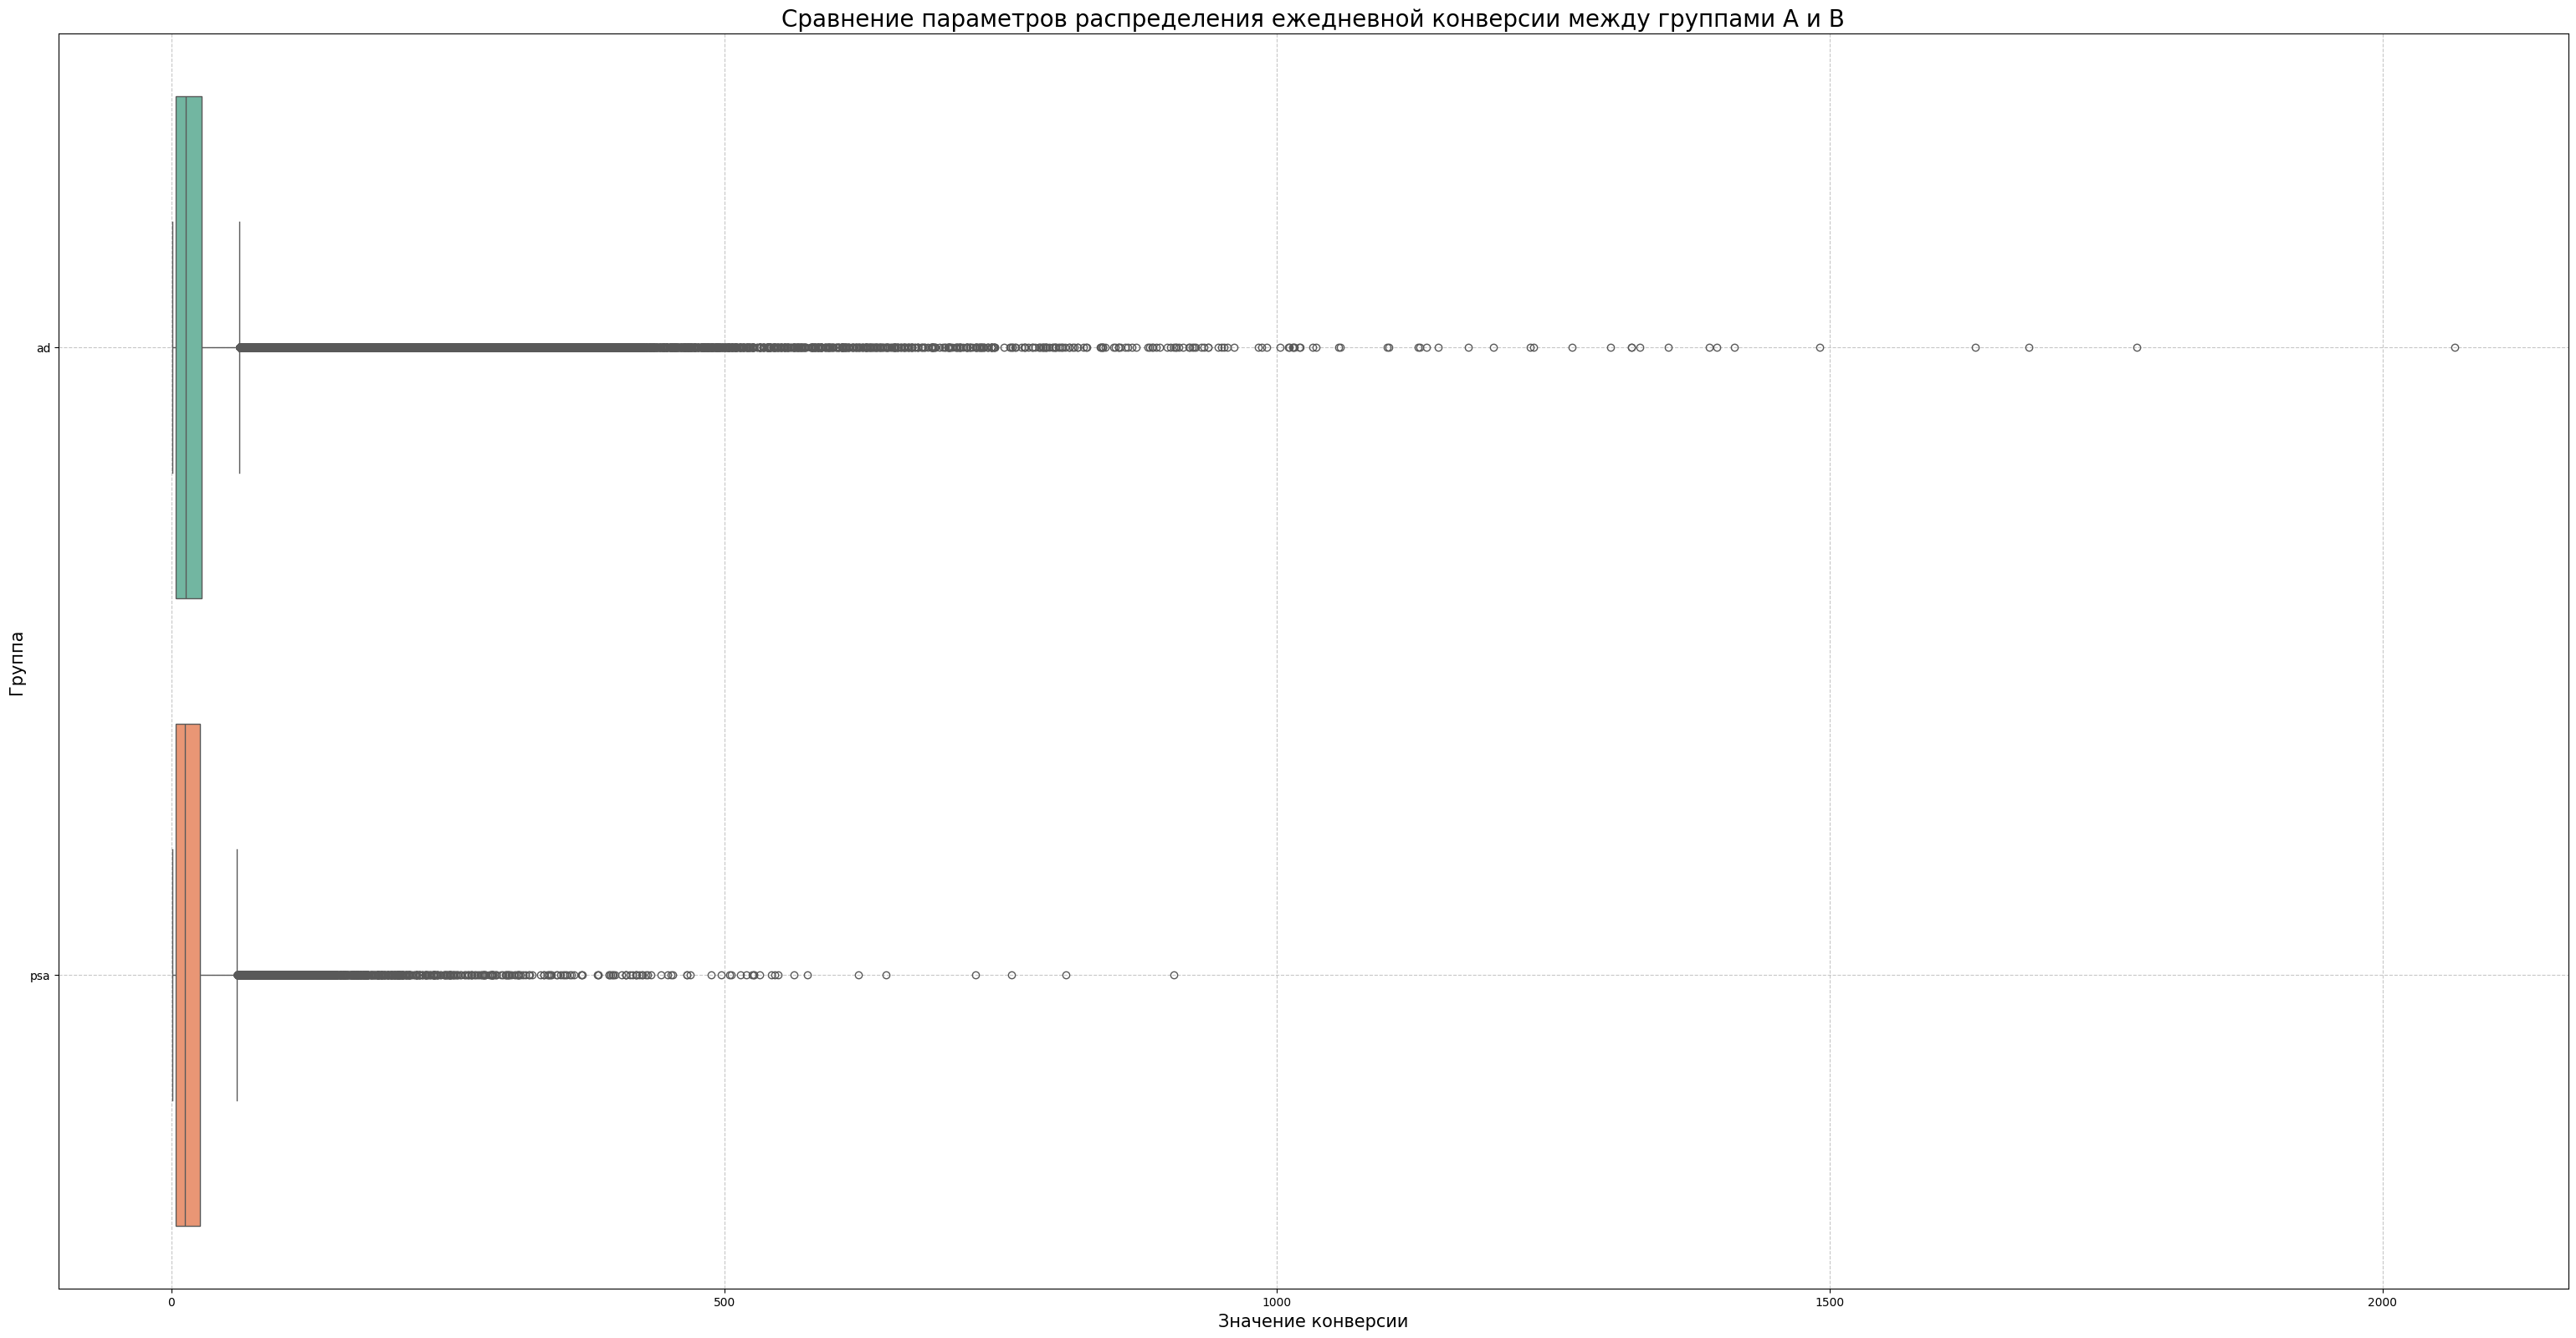

In [73]:
# Задаём заглавие графика
print('-' * 150)
print('Коробчатая диаграмма для сравнения параметров распределения ежедневной конверсии по группам.')



# Задаём размер графика
fig = plt.figure(figsize = (30, 15)) 

# Добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])


# Строим диаграмму
sns.boxplot(
    data = AB_marketing_df,
    x = 'total ads',
    y = 'test group',
    palette = 'Set2',
    ax = ax
)


# Задаём параметры графика
ax.set_title('Сравнение параметров распределения ежедневной конверсии между группами A и B', fontsize = 20)
ax.set_xlabel('Значение конверсии', fontsize = 15)
ax.set_ylabel('Группа', fontsize = 15)
ax.grid(True, linestyle = '--', alpha = 0.7);

**Выводы:**

* Количество посещений в группе *'ad'* ($564577$) значительно превышает количество в группе *'psa'* ($23524$). Относительная разница составляет примерно $4.2$%. Это очень малая разница в процентном соотношении, но абсолютное количество посещений в группе *'ad'* в тысячи раз больше, чем в *'psa'*. Таким образом, с точки зрения абсолютных значений выборки несопоставимы.

* Выборки нельзя считать сбалансированными из-за огромного дисбаланса в количестве посещений ($564577$ против $23524$). Это может повлиять на достоверность результатов $A/B$-теста.

Для более точного анализа рекомендуется сбалансировать выборки (например, случайно выбрать $23524$ пользователя из группы *'ad'* для сравнения с группой *'psa'*).

Проанализируем распределение признаков `most ads day` (день с наибольшим количеством рекламы) и `most ads hour` (час с наибольшим количеством рекламы) для групп *'ad'* и *'psa'*, чтобы оценить их однородность. Для этого построим графики, которые помогут визуально сравнить распределения.

Строим график распределения по дням (`most ads day`):

------------------------------------------------------------------------------------------------------------------------------------------------------
График распределения по дням, в которые пользователь увидел наибольшее количество рекламы.


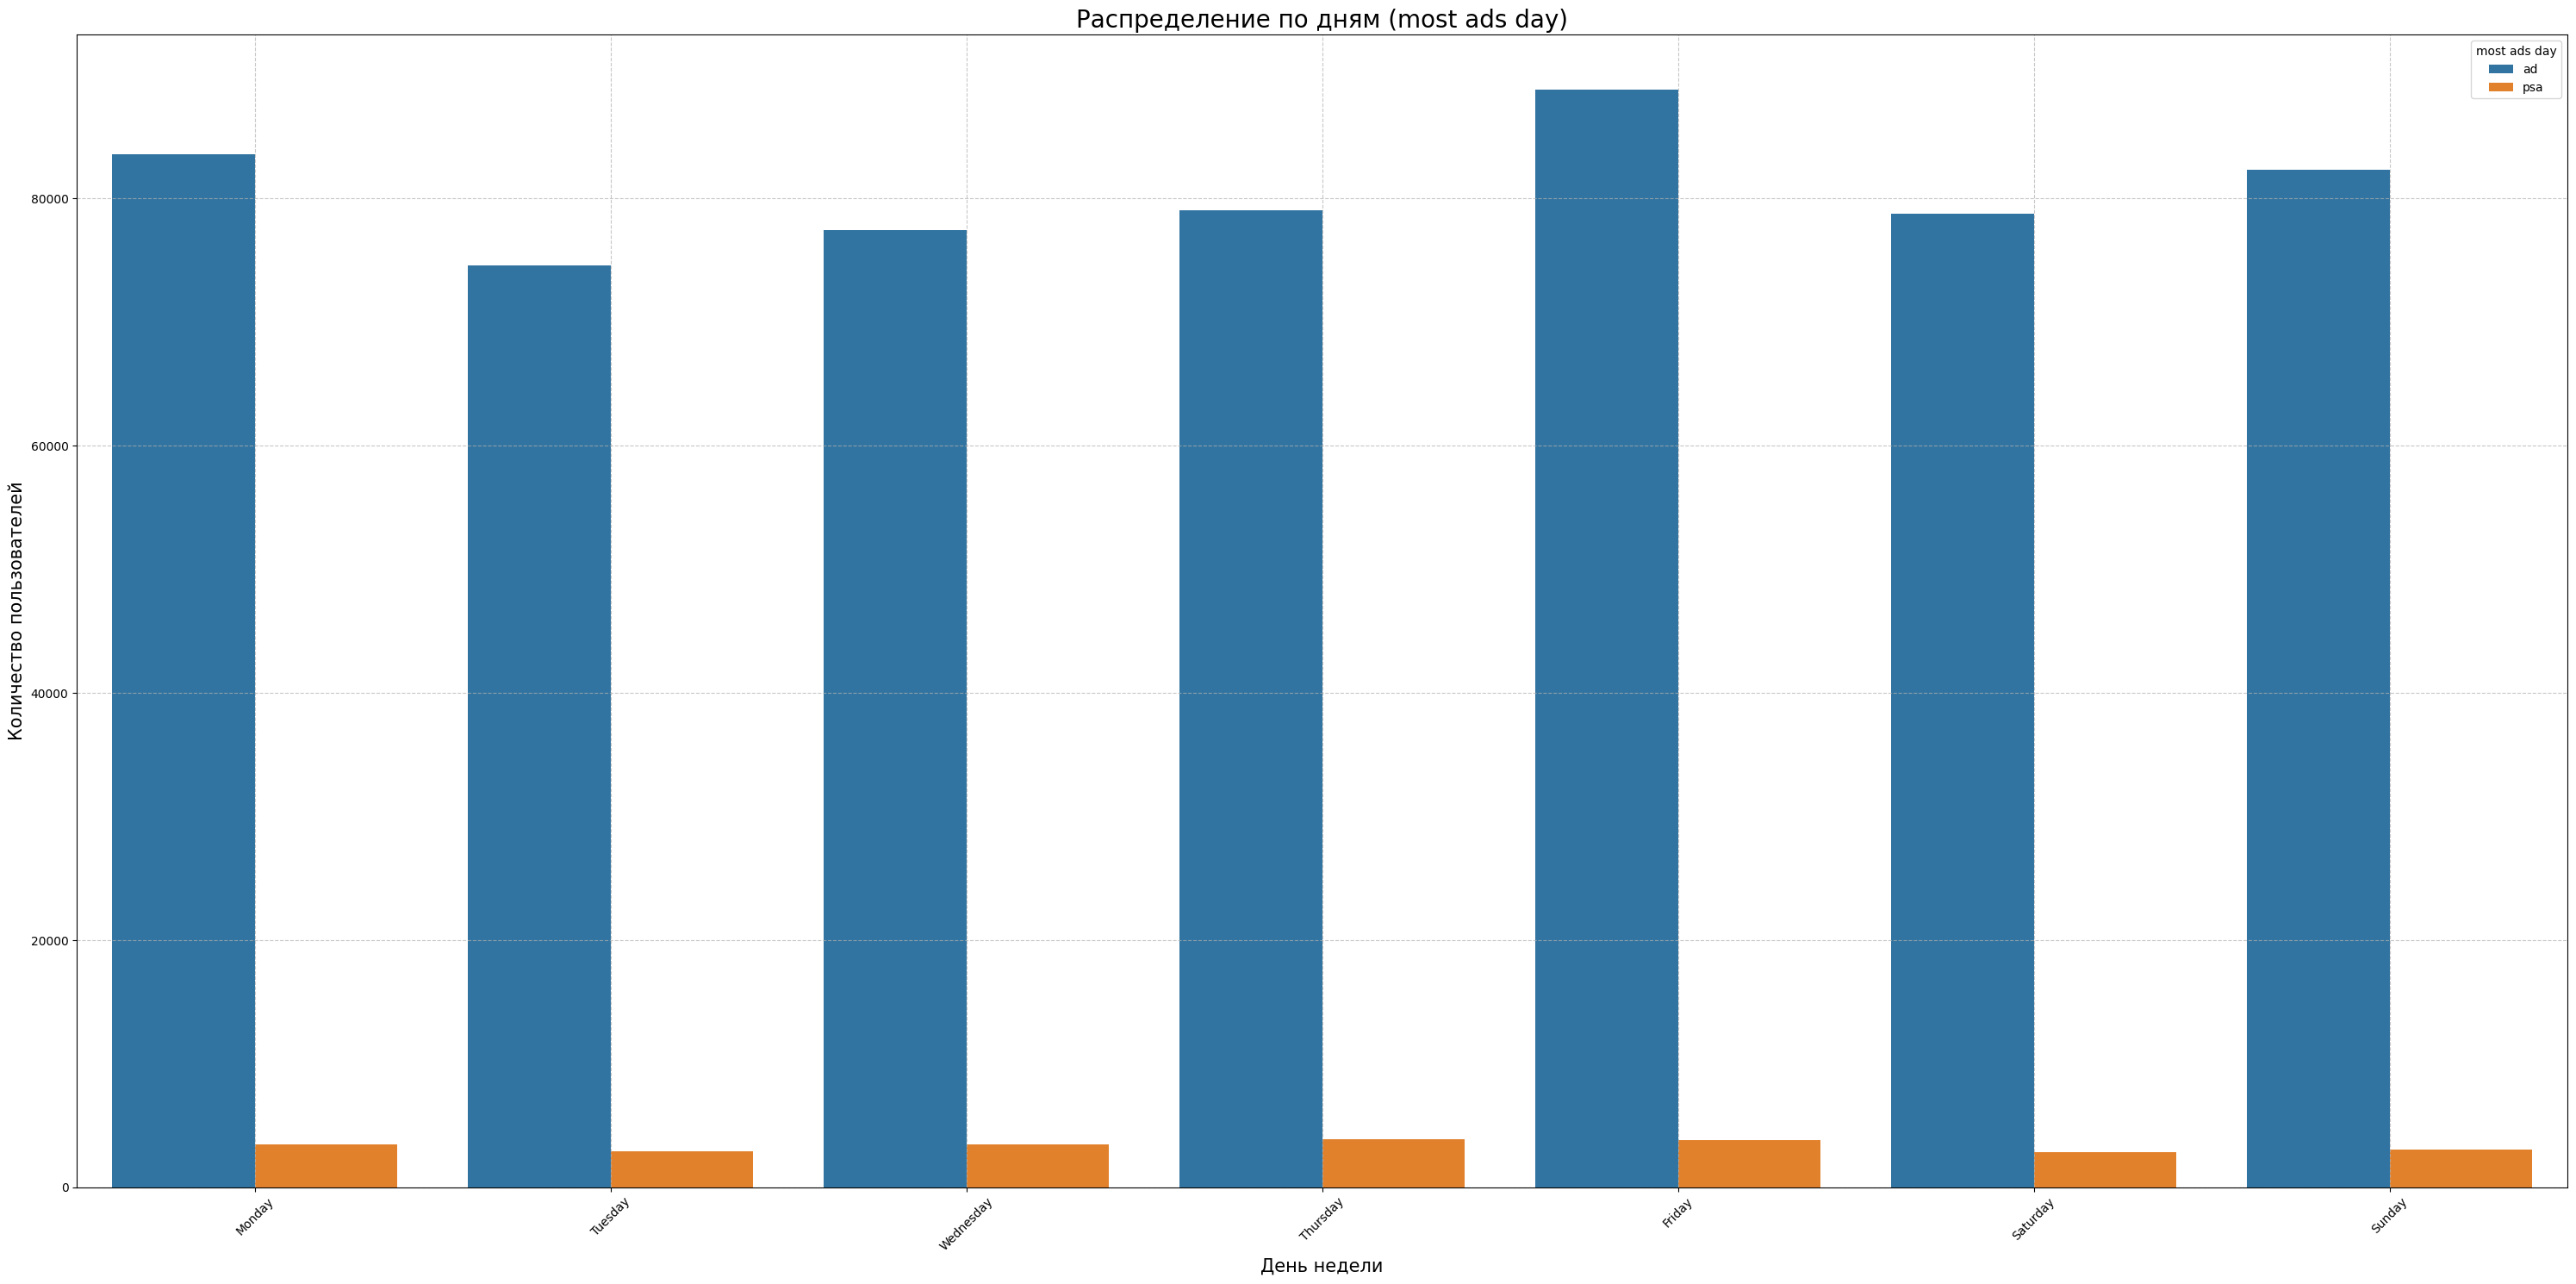

In [35]:
# Задаём заглавие графика
print('-' * 150)
print('График распределения по дням, в которые пользователь увидел наибольшее количество рекламы.')


# Задаём размеры графика
plt.rcParams['figure.figsize'] = (30, 15)


# Создаём график
sns.countplot(
    data = AB_marketing_df,
    x = 'most ads day',
    hue = 'test group',
    order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)


# Задаём стиль графика
plt.title('Распределение по дням (most ads day)', fontsize = 20)
plt.xlabel('День недели', fontsize = 15)
plt.ylabel('Количество пользователей', fontsize = 15)
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.xticks(rotation = 45)
plt.legend(title = 'most ads day')
plt.tight_layout()

# Выводим график
plt.show()

**Вывод:**

Распределения по дням в обеих группах схожи — пятница доминирует, а вторник наименее популярен. Однако из-за огромной разницы в размерах выборок ($564577$ против $23524$) сложно говорить о полной однородности. В процентном соотношении группы выглядят схожими, но абсолютные значения сильно различаются.

Строим график распределения по часам (`most ads hour`):

------------------------------------------------------------------------------------------------------------------------------------------------------
График распределения по часам, в которые пользователь увидел наибольшее количество рекламы.


C:\Users\User\AppData\Local\Temp\ipykernel_1980\3312756924.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = 'most ads hour')


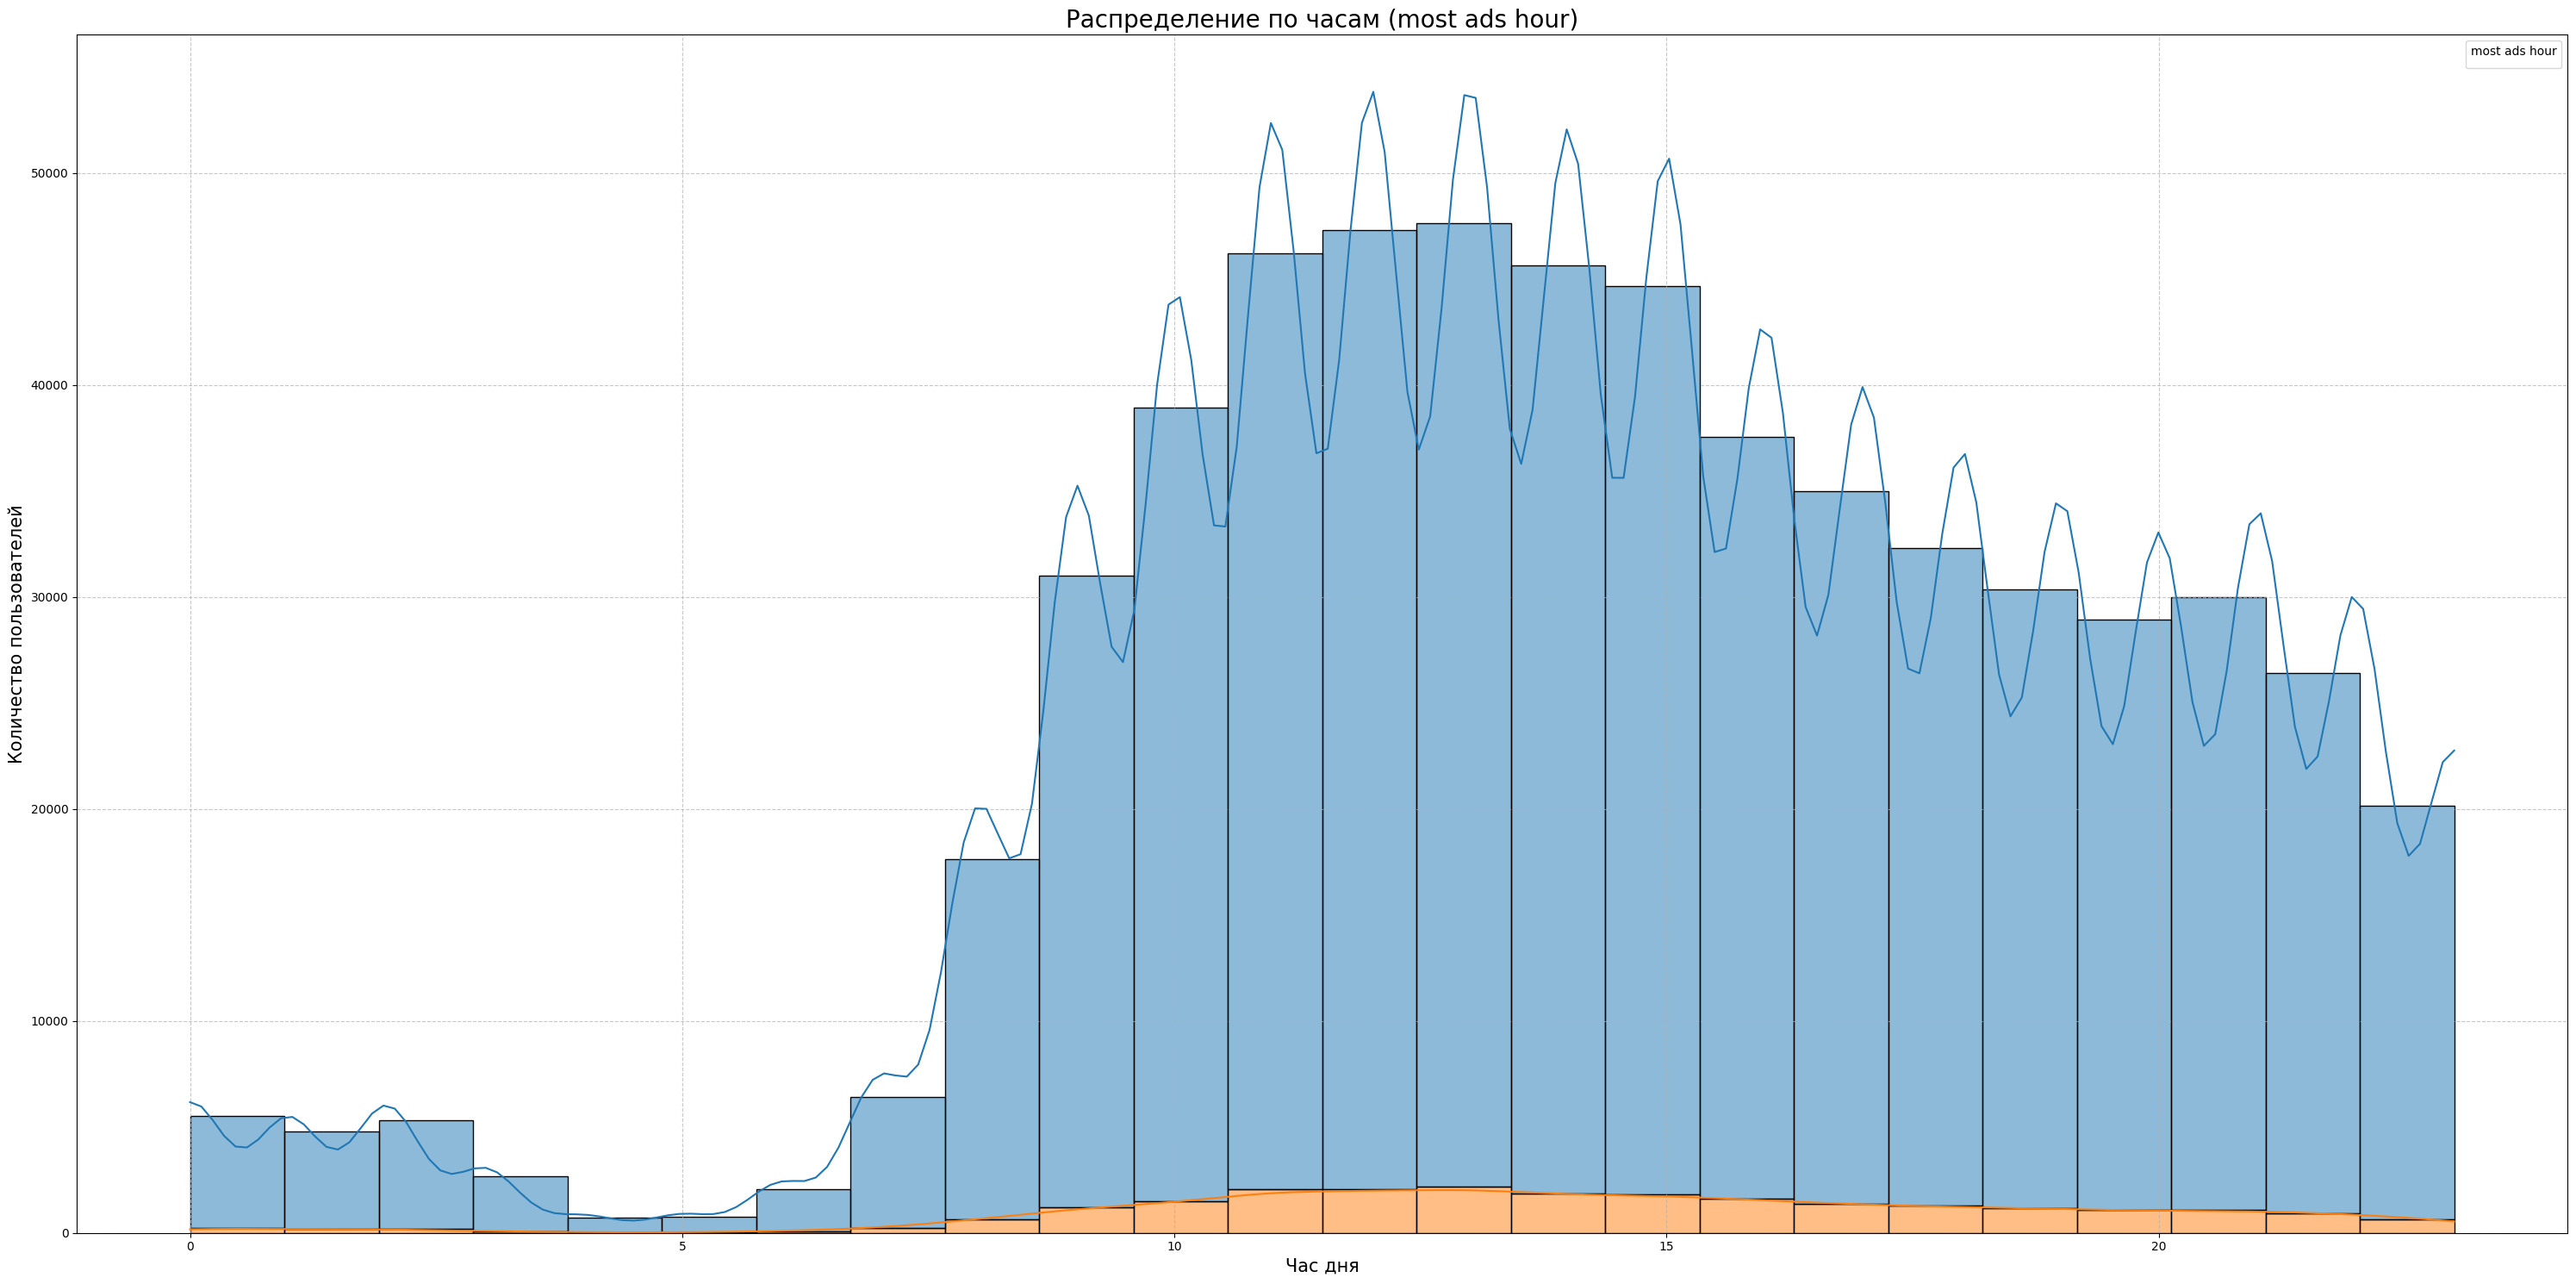

In [37]:
# Задаём заглавие графика
print('-' * 150)
print('График распределения по часам, в которые пользователь увидел наибольшее количество рекламы.')


# Задаём размеры графика
plt.rcParams['figure.figsize'] = (30, 15)


# Создаём график
sns.histplot(
    data = AB_marketing_df,
    x = 'most ads hour',
    hue = 'test group',
    multiple = 'stack',
    bins = 24,
    kde = True
)


# Задаём стиль графика
plt.title('Распределение по часам (most ads hour)', fontsize = 20)
plt.xlabel('Час дня', fontsize = 15)
plt.ylabel('Количество пользователей', fontsize = 15)
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.legend(title = 'most ads hour')
plt.tight_layout()


# Выводим график
plt.show()

**Вывод:**

Распределение по часам также схоже: обе группы показывают пик в 13:00 и низкую активность в ранние часы. Это говорит о том, что поведение пользователей в обеих группах по времени суток одинаково.

#### $3.2$

**Рассчёт ключевых показателей для контрольной и тестовой групп.**

Для начала, разделим данные по группам:

In [16]:
# Разделяем данные по группам 'ad' и 'psa'
ad_group = AB_marketing_df[AB_marketing_df['test group'] == 'ad']
psa_group = AB_marketing_df[AB_marketing_df['test group'] == 'psa']


# Выведем размерности групп
print(f'Размерность группы "ab": {ad_group.shape}')
print(f'Размерность группы "psa": {psa_group.shape}')

Размерность группы "ab": (564577, 6)
Размерность группы "psa": (23524, 6)


Построим визуализацию распределений обоих выборок:

------------------------------------------------------------------------------------------------------------------------------------------------------
График распределения выборок A (ad) и B (psa):


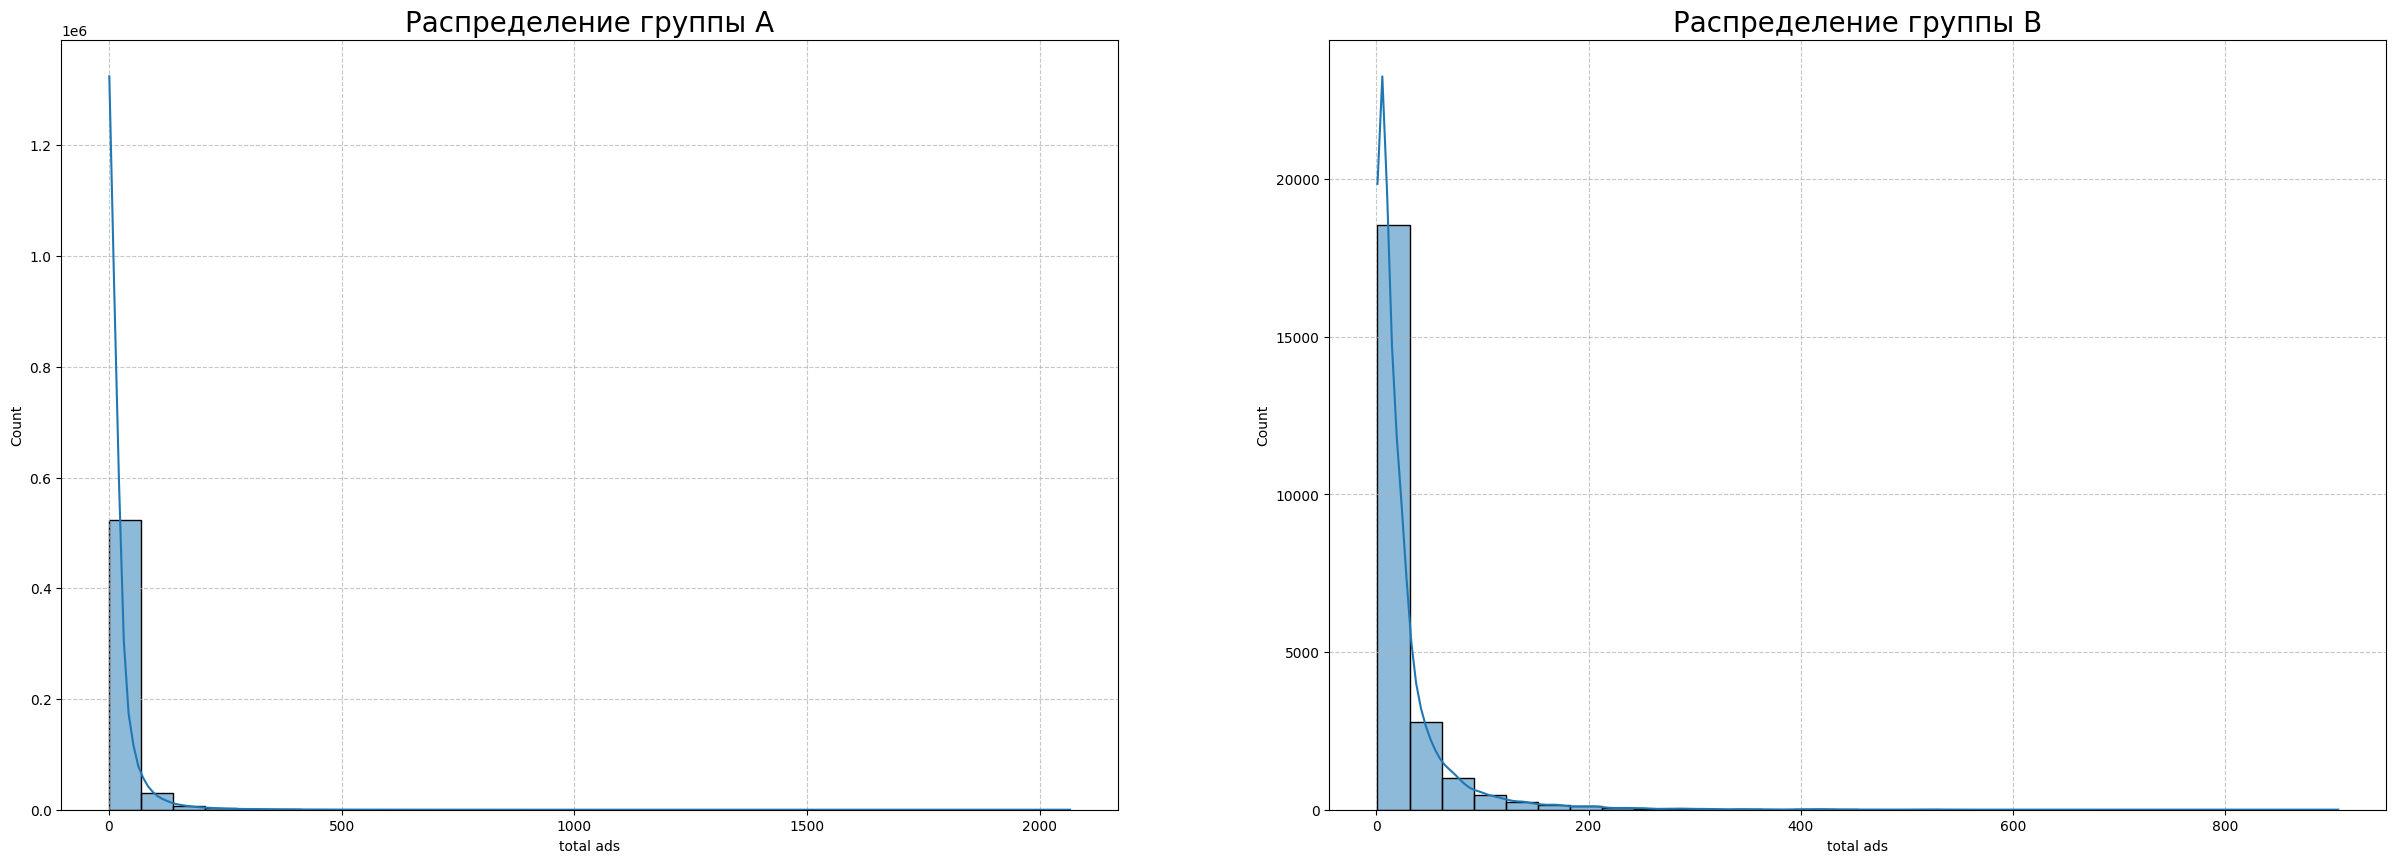

In [18]:
# Задаём заглавие графика
print('-' * 150)
print('График распределения выборок A (ad) и B (psa):')



# Задаём размер для двух графиков
fig, axes = plt.subplots(1, 2, figsize = (30, 10))



# Строим гистограммы
sns.histplot(
    data = ad_group, 
    x = 'total ads',
    bins = 30,
    kde = True,
    ax = axes[0]
)

sns.histplot(
    data = psa_group,
    x = 'total ads',
    bins = 30,
    kde = True,
    ax = axes[1]
)



# Задаём параметры первого графика
axes[0].set_title('Распределение группы A', fontsize = 20)
axes[0].grid(True, linestyle = '--', alpha = 0.7)

# Задаём параметры второго графика
axes[1].set_title('Распределение группы B', fontsize = 20)
axes[1].grid(True, linestyle = '--', alpha = 0.7)

**Вывод:**

Гистограммы показывают, что распределения для групп $A$ (*'ad'*) и $B$ (*'psa'*) скошены вправо с пиками около 0–10. Группа $A$ имеет более высокую плотность при низких значениях, а группа $B$ — более длинный правый хвост.

Рассчитаем конверсию и среднее количество рекламы, увиденной пользователем:

In [19]:
# Рассчитываем конверсию
conversion_ad = (ad_group['converted'].sum() / len(ad_group)) * 100
conversion_psa = (psa_group['converted'].sum() / len(psa_group)) * 100

# Рассчитываем среднее количество рекламы
avg_ads_ad = ad_group['total ads'].mean()
avg_ads_psa = psa_group['total ads'].mean()


# Создаем таблицу с результатами
summary_table = pd.DataFrame({
    'Группа': ['ad', 'psa'],
    'Конверсия (%)': [conversion_ad, conversion_psa],
    'Среднее количество рекламы': [avg_ads_ad, avg_ads_psa]
})


# Выводим информацию по DataFrame при помощи функции 'check_data_inf'
check_data_inf(
    data = summary_table,
    length1 = 40,
    length2 = 55
)

Данные имеют следующую размерность:

Количество строк: 2;
Количество признаков (столбцов): 3.
----------------------------------------


,Группа,Конверсия (%),Среднее количество рекламы
0,ad,2.554656,24.823365
1,psa,1.785411,24.761138


-------------------------------------------------------


Построим визуализацию:

------------------------------------------------------------------------------------------------------------------------------------------------------
График сравнения конверсии и среднего количества рекламы по группам.


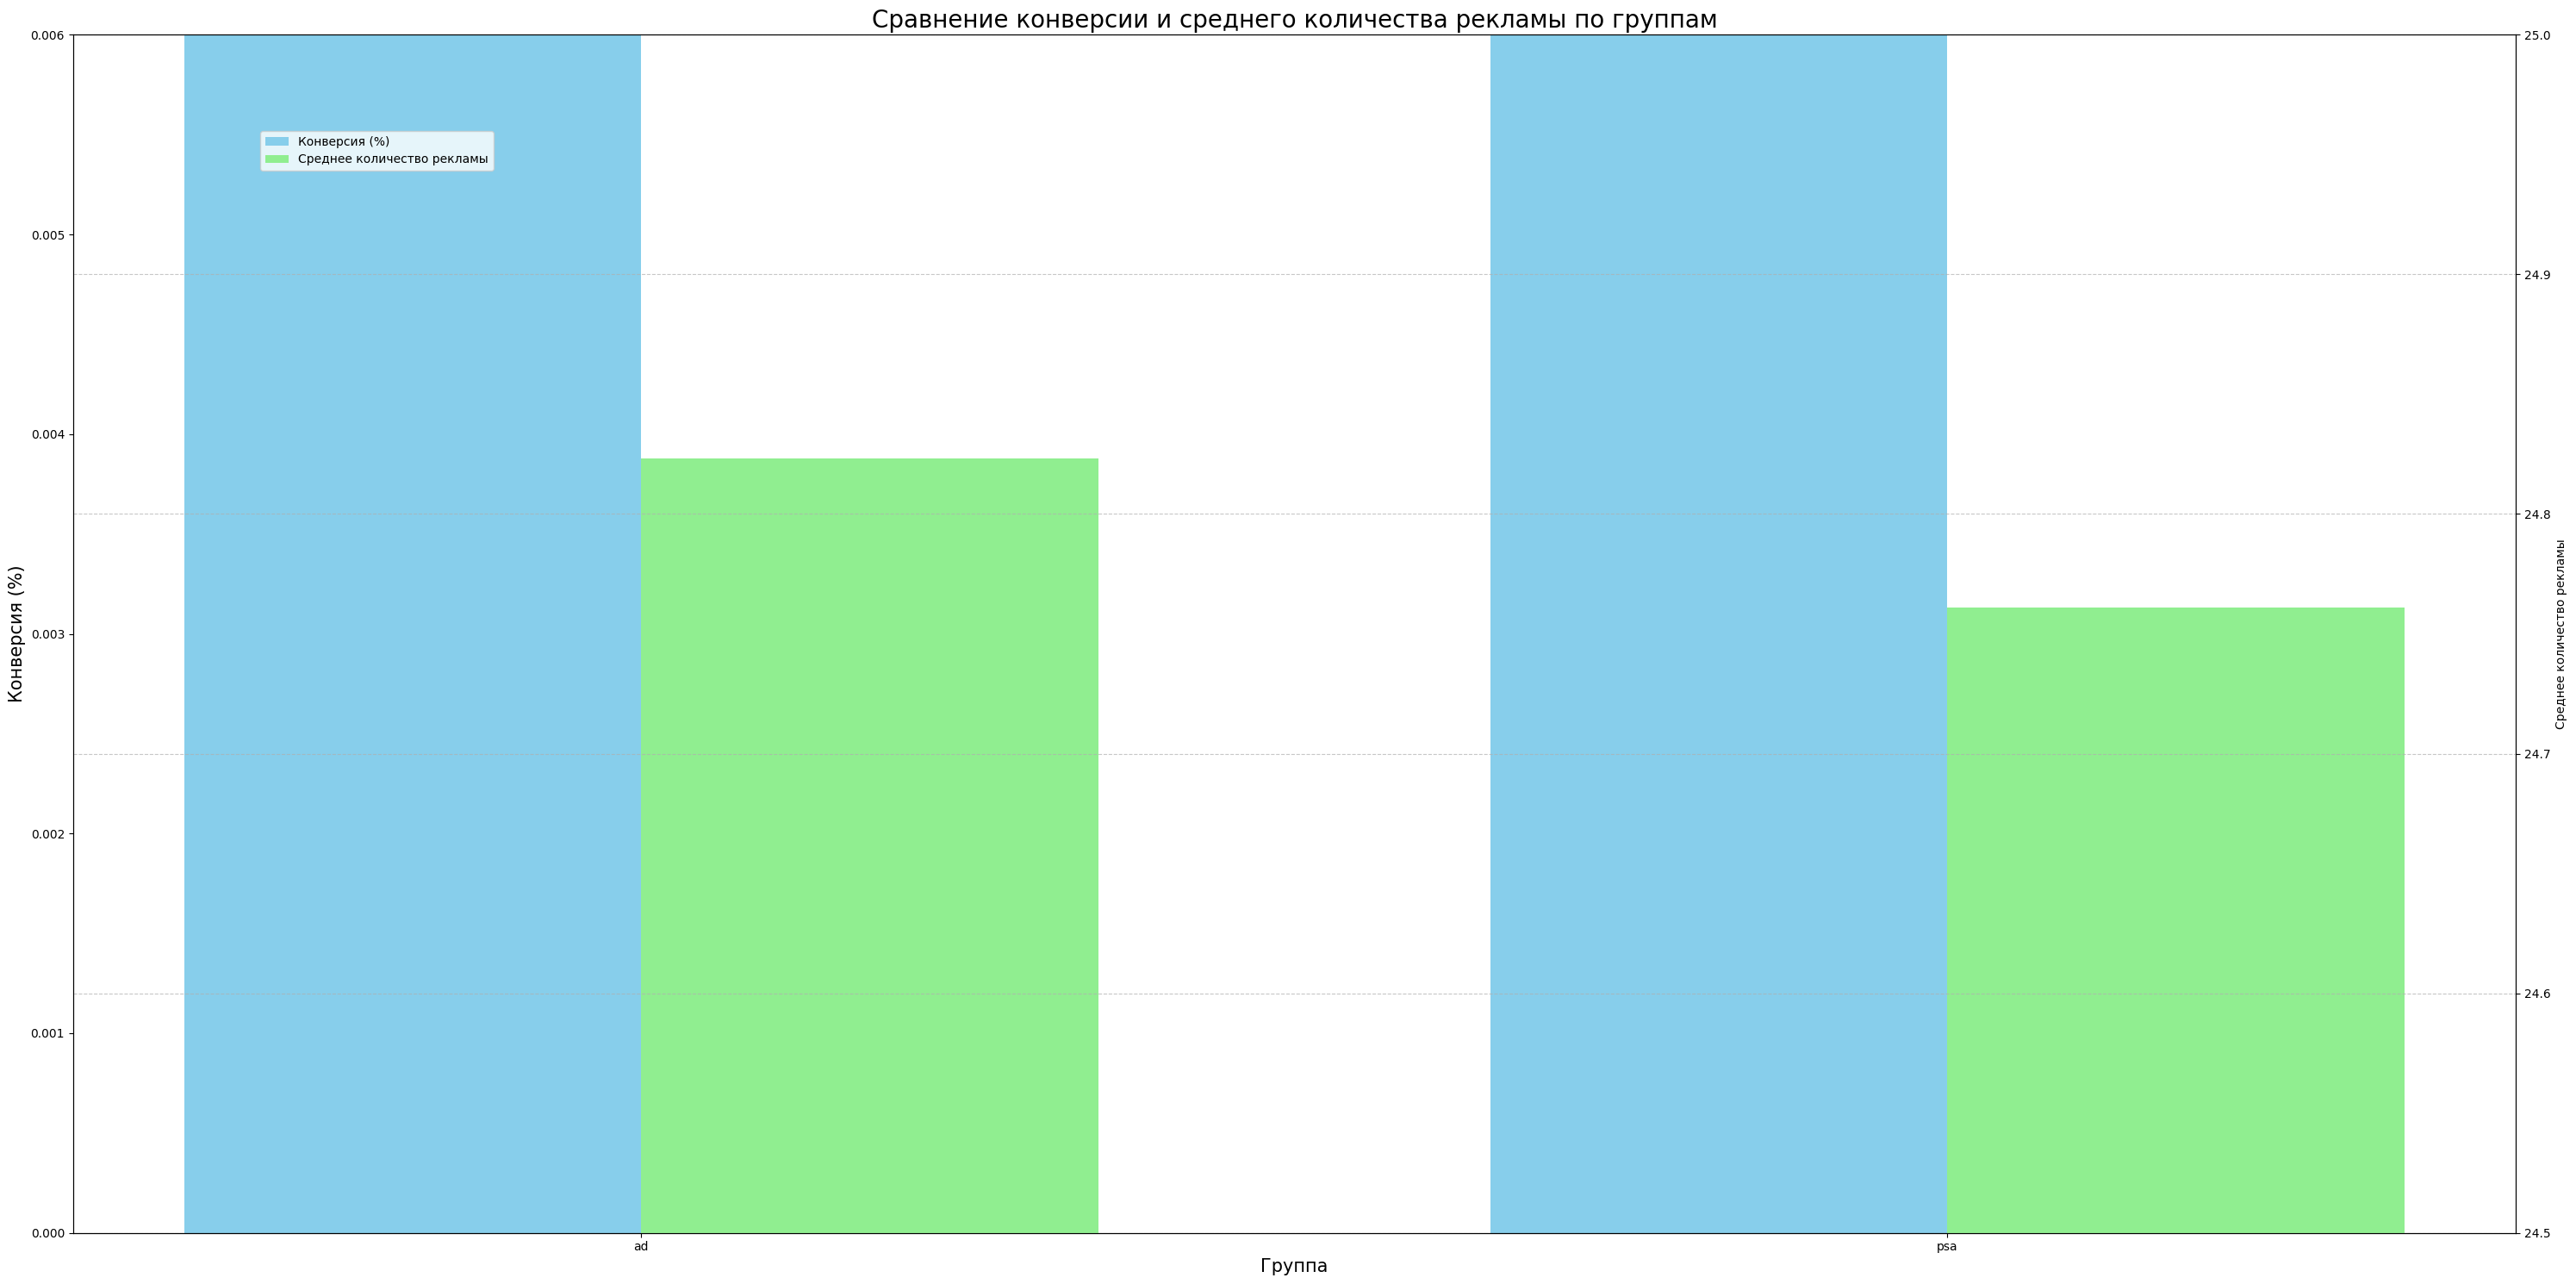

In [49]:
# Задаём заглавие графика
print('-' * 150)
print('График сравнения конверсии и среднего количества рекламы по группам.')



# Задаём данные
groups_list = ['ad', 'psa']
conversion_list = [2.554656, 1.785411]
avg_ads = [24.823365, 24.761138]


# Устанавливаем ширину столбцов
bar_width = 0.35
index = np.arange(len(groups_list))



# Задаём размер графика
fig, ax1 = plt.subplots(figsize = (30, 15))

# Столбцы для конверсии (левая ось Y)
ax1.bar(index, conversion_list, bar_width, label='Конверсия (%)', color='skyblue')
ax1.set_xlabel('Группа', fontsize = 15)
ax1.set_ylabel('Конверсия (%)', color='black', fontsize = 15)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, 0.006) 

# Создаем вторую ось Y для среднего количества рекламы
ax2 = ax1.twinx()
ax2.bar(index + bar_width, avg_ads, bar_width, label='Среднее количество рекламы', color='lightgreen')
ax2.set_ylabel('Среднее количество рекламы', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(24.5, 25.0)

# Задаём стиль графика
plt.title('Сравнение конверсии и среднего количества рекламы по группам', fontsize = 20)
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(groups_list)
plt.grid(True, linestyle = '--', alpha = 0.7)
fig.tight_layout()

# Добавляем легенду
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

# Выводим график
plt.show()

**Выводы:**

* На первый взгляд, вариант $A$ (*'ad'*) эффективнее варианта $B$ (*'psa'*) по показателю конверсии, так как в группе *'ad'* покупок больше, чем в группе *'psa'*. 

* Разница в среднем количестве рекламы минимальна (примерно $2.6$ показа на пользователя). Это говорит о том, что обе группы видели примерно одинаковое количество рекламы, и по этому показателю ни один вариант не выглядит эффективнее другого.

Касаемо эффективности, то вариант $A$ (*'ad'*) эффективнее по конверсии: У группы *'ad'* значение конверсии чуть выше, чем у *'psa'* ($2.6$ против $1.8$). Это говорит о том, что реклама (вариант $A$) немного лучше стимулировала покупки, в отличие от объявлений государственной службы (вариант $B$).

## <CENTER> **`4.` Статистический анализ результатов A/B-тестирования**

На данном этапе мы сформулируем и проверим статистические гипотезы, проведём тесты и построим доверительные интервалы.

#### $4.1$

**Формулировка статистических гипотез и подбор статистического теста для их проверки.**

Сформулируем статистические гипотезы и выберем подходящие тесты для анализа данных в соответствии с поставленными бизнес-вопросами:

1. Была ли реклама успешной?
2. Сколько компания может заработать на рекламе?
3. Является ли разница между группами статистически значимой?

---

##### **1. Была ли реклама успешной?**

* **Статистические гипотезы:**

    * $H_0$: Конверсия в группе *'ad'* не отличается от конверсии в группе *'psa'* (реклама не оказала влияния);

    * $​H_1$: Конверсия в группе *'ad'* выше, чем в группе *'psa'* (реклама была успешной).

* **Выбор теста:**

Поскольку мы сравниваем пропорции (конверсии) между двумя независимыми группами, используем **$Z$-тест для пропорций**.

* **Проверка нормальности:**

Для $Z$-теста нормальность не требуется, так как он основан на асимптотическом приближении и работает с большими выборками.

---

##### **2. Сколько компания может заработать на рекламе?**

* **Статистические гипотезы:**

    * $H_0$: Ожидаемая прибыль от группы *'ad'* равна нулю или не превышает прибыль от группы *'psa'*;

    * $H_1$: Ожидаемая прибыль от группы *'ad'* положительна и превышает прибыль от группы *'psa'*.

* **Выбор теста:**

Мы могли бы сравнить средние доходы между группами с помощью **t-теста** или **U-теста Манна-Уитни** (в зависимости от нормальности).

* **Проверка нормальности:**

Такие данные можно проверить на нормальность с помощью **теста Шапиро-Уилка** или визуально (**гистограмма/Q-Q plot**).

---

##### **3. Является ли разница между группами статистически значимой?**

* **Статистические гипотезы:**

    *Для конверсии*:

    * $H_0$: Конверсии в группах *'ad'* и *'psa'* равны;
    * $H_1$: Конверсии в группах *'ad'* и *'psa'* различаются.

    *Для среднего количества рекламы*:

    * $H_0$: Среднее количество рекламы в группах *'ad'* и *'psa'* равно;
    * $H_1$: Среднее количество рекламы в группах *'ad'* и *'psa'* различается'

* **Выбор теста:**

*Для конверсии*: Используем **Z-тест** для пропорций, как в первом случае, так как сравниваем две пропорции.

*Для среднего количества рекламы*: Используем **t-тест для независимых выборок** (если данные нормально распределены) или **U-тест Манна-Уитни** (если нормальность не соблюдается).

* **Проверка нормальности:**

Для столбца `total ads` проведем **тест Шапиро-Уилка**:

In [20]:
# Задаём уровень значимости
alpha = 0.05

# Вычисляем результат теста Шапиро — Уилка для выборок
shapiro_result_a = stats.shapiro(ad_group['total ads'])
shapiro_result_b = stats.shapiro(psa_group['total ads'])


# Выводим результаты
print(f'p-value группы А (ad_group): {round(shapiro_result_a.pvalue, 2)}')
print('-' * 35)
print(f'p-value группы B (psa_group): {round(shapiro_result_b.pvalue, 2)}')
print('-' * 35)

print('\n')


# Сравниваем полученное p-value для группы А (ad_group) с уровнем значимости
if shapiro_result_a.pvalue <= alpha:
    print('Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе А (ad_group) отлично от нормального')
else:
    print('Принимаем нулевую гипотезу. Распределение в группе А (ad_group) является нормальным')
print('-' * 115)
    
    
# Сравниваем полученное p-value для группы B (psa_group) с уровнем значимости
if shapiro_result_b.pvalue <= alpha:
    print('Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе B (psa_group) отлично от нормального')
else:
    print('Принимаем нулевую гипотезу. Распределение в группе B (psa_group) является нормальным')
print('-' * 115)

p-value группы А (ad_group): 0.0
-----------------------------------
p-value группы B (psa_group): 0.0
-----------------------------------


Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе А (ad_group) отлично от нормального
-------------------------------------------------------------------------------------------------------------------
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе B (psa_group) отлично от нормального
-------------------------------------------------------------------------------------------------------------------


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 564577.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 23524.
  res = hypotest_fun_out(*samples, **kwds)


Дополнительно построим гистограмму:

------------------------------------------------------------------------------------------------------------------------------------------------------
Гистограмма для определения нормальности распределения:


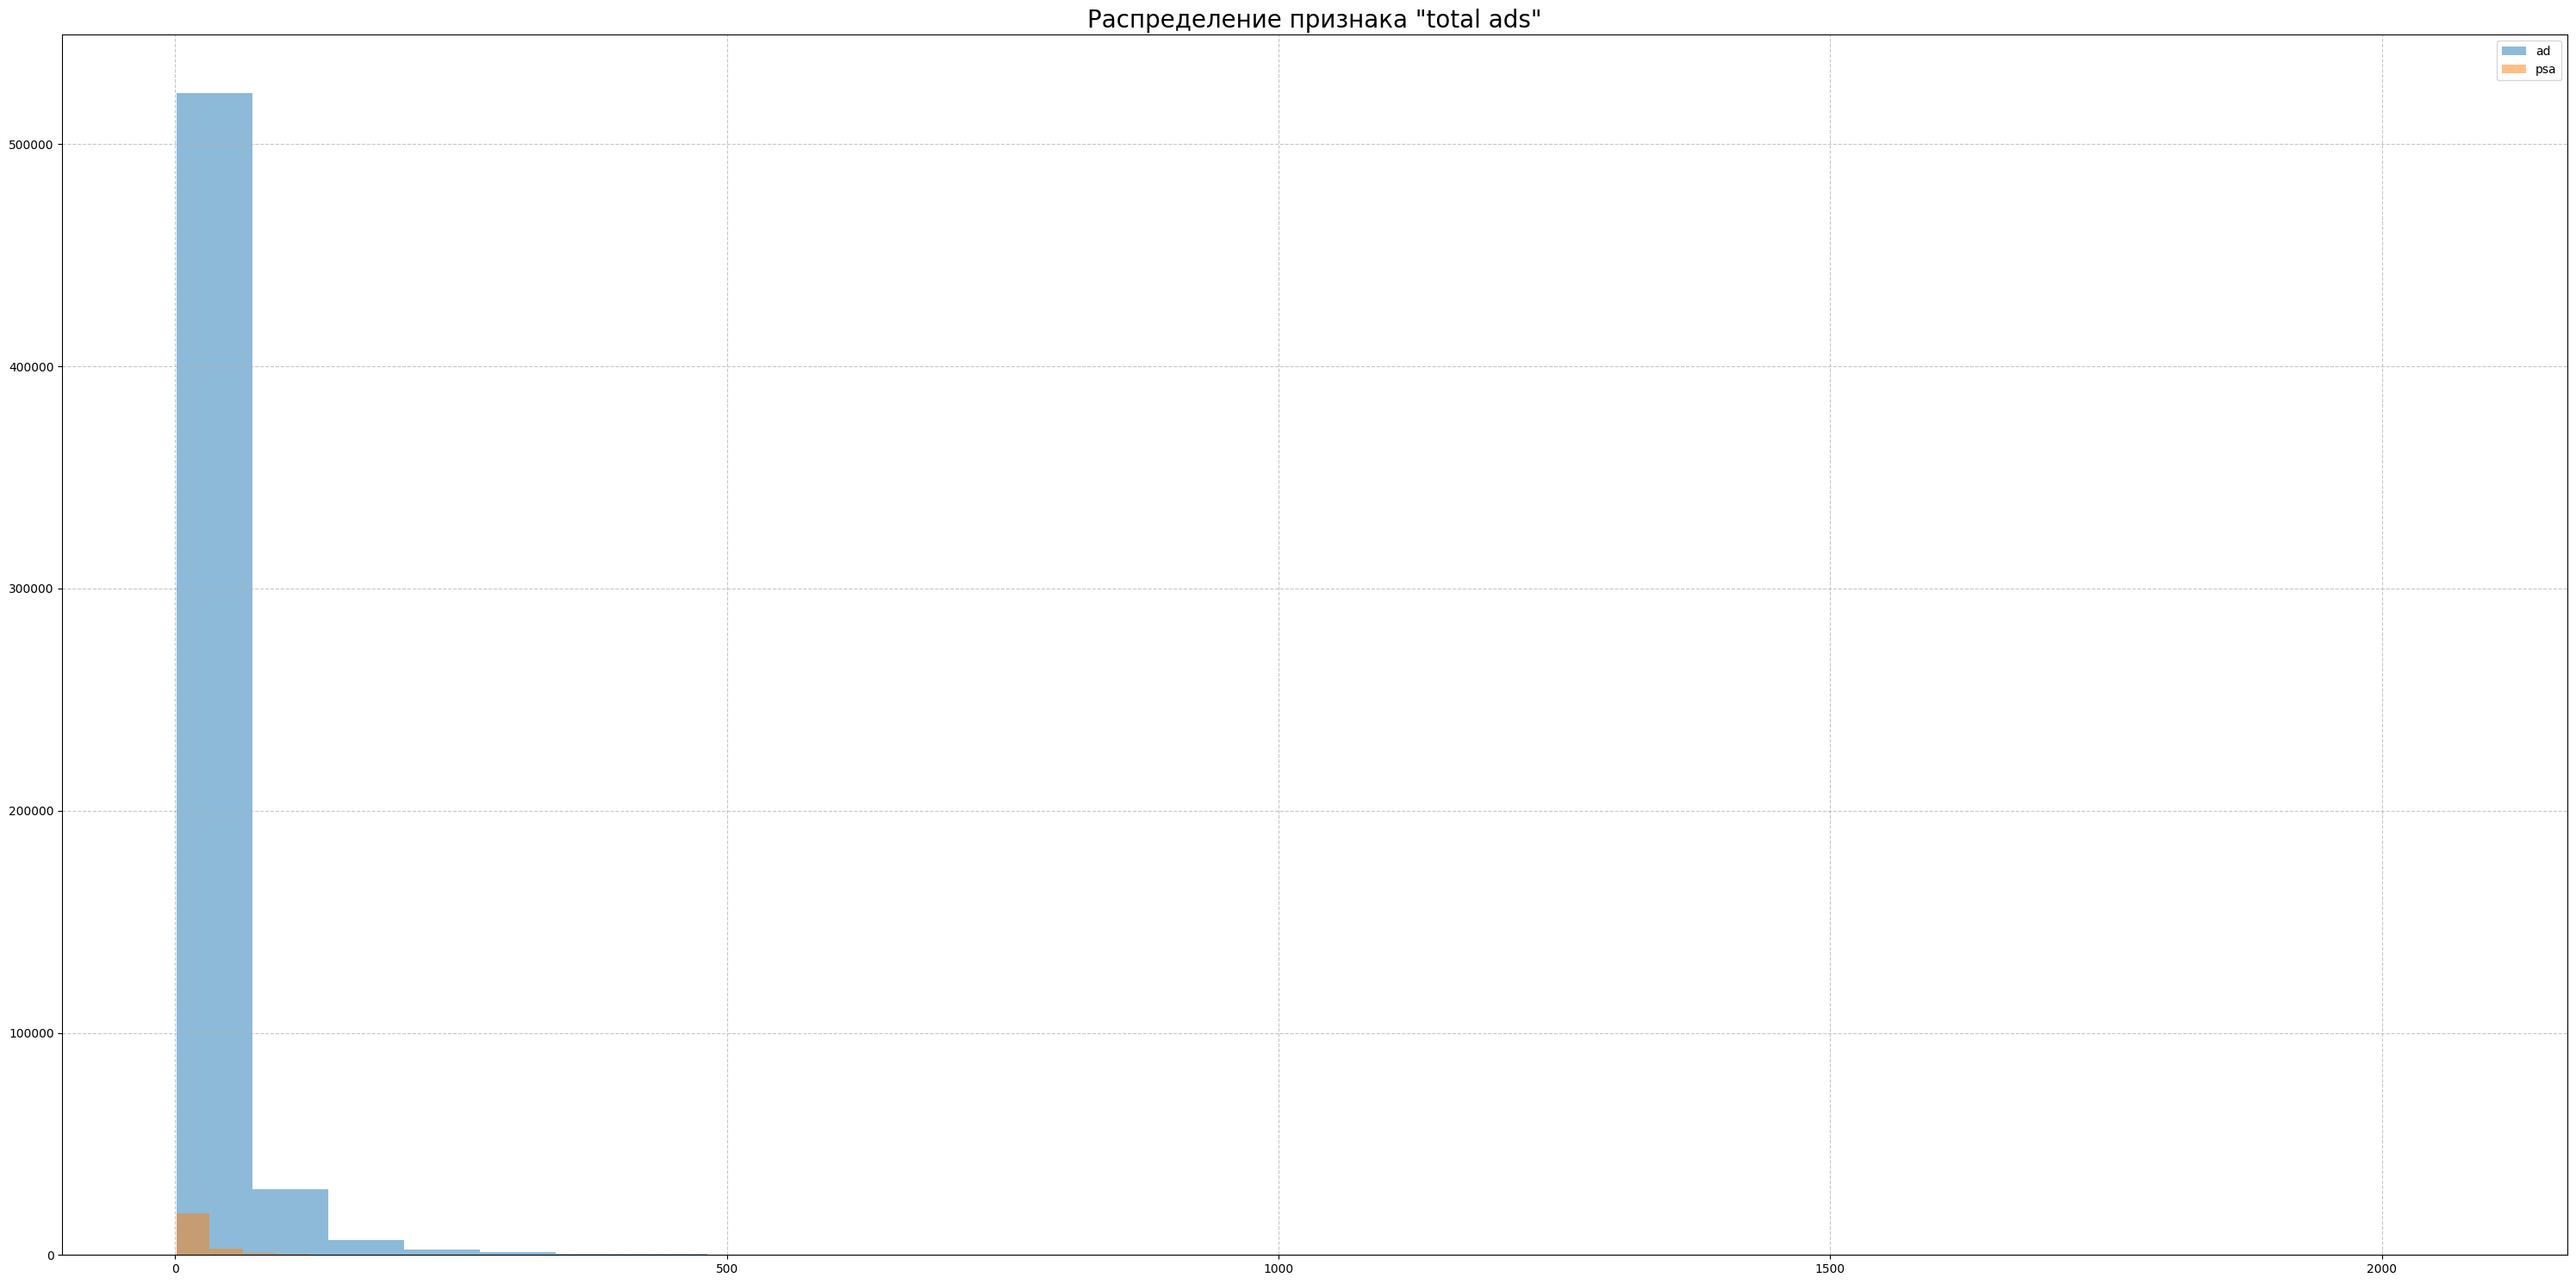

In [56]:
# Создаём заголовок для графика
print('-' * 150)
print('Гистограмма для определения нормальности распределения:')



# Задаём размер графика
plt.rcParams['figure.figsize'] = (30, 15)

# Строим гистограмму для признака 'total ads'
plt.hist(ad_group['total ads'], bins=30, alpha=0.5, label='ad')
plt.hist(psa_group['total ads'], bins=30, alpha=0.5, label='psa')

# Задаём название графика и осей
plt.title('Распределение признака "total ads"', fontsize = 20)
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.legend()

# Отображаем график
plt.show()

**Вывод:**

Из полученного графика следует, что распределение не нормально, поэтому используем **U-тест Манна-Уитни**:

In [21]:
# Задаём уровень значимости
alpha = 0.05


# Вычисляем результат теста Манна — Уитни для выборок
U_test = stats.mannwhitneyu(
    x = ad_group['total ads'],
    y = psa_group['total ads'],
    alternative = 'two-sided'
)

# Рассчитываем p-value
print(f'Значение p-value: {round(U_test.pvalue, 2)}')
print('-' * 35)



# Сравниваем полученное p-value с уровнем значимости
if U_test.pvalue <= alpha:
    print('Отвергаем нулевую гипотезу в пользу альтернативной. Реклама оказалась эффективнее, чем объявления государственной службы.')
else:
    print('У нас нет оснований отвергнуть нулевую гипотезу. Реклама не оказалась эффективной.')
print('-' * 120)

Значение p-value: 0.0
-----------------------------------
Отвергаем нулевую гипотезу в пользу альтернативной. Реклама оказалась эффективнее, чем объявления государственной службы.
------------------------------------------------------------------------------------------------------------------------


**Вывод:**

Учитывая, что конверсия в группе *'ad'* выше, чем в группе *'psa'*, можно сделать вывод, что реклама (группа *'ad'*) была более успешной по сравнению с контрольной группой *'psa'*, так как стимулировала больше покупок.

#### $4.2$

**Проводим статистические тесты.**

С помощью аппарата статистических тестов определим, есть ли статистическая разница между конверсиями в группах $А$ и $B$.

**Гипотезы:**

  * $H_0$: Конверсии в группах $A$ и $B$ равны;
  * $H_1$: Конверсии в группах $A$ и $B$ различаются.

**Выбор теста:**

  * Используем **Z-тест для пропорций**, так как сравниваем две независимые пропорции (конверсии) с большими выборками:

In [22]:
# Фиксируем ранее полученные данные
successes_list = [14423, 420]
nobs_list = [564577, 23524]


# Задаём уровень значимости
alpha = 0.05


# Вычисляем значение p-value для Z-теста для пропорций
_, p_value = proportion.proportions_ztest(
    count = successes_list,     # число «успехов»            
    nobs = nobs_list,           # общее число наблюдений
    alternative = 'two-sided'
)

# Рассчитываем p-value
print(f'Значение p-value: {round(p_value, 3)}')
print('-' * 35)



# Сравниваем полученное p-value с уровнем значимости
if (p_value <= alpha):
    print('Отвергаем нулевую гипотезу в пользу альтернативной. Конверсии в группах A и B различаются.')
else:
    print('У нас нет оснований отвергнуть нулевую гипотезу. Конверсии в группах A и B равны.')
print('-' * 90)

Значение p-value: 0.0
-----------------------------------
Отвергаем нулевую гипотезу в пользу альтернативной. Конверсии в группах A и B различаются.
------------------------------------------------------------------------------------------


**Вывод:**

Статистическая разница между конверсиями в группах $A$ (*'ad'*) и $B$ (*'psa'*) существует. Конверсия в группе $A$ значимо отличается от конверсии в группе $B$, что подтверждает эффективность рекламы в группе $A$.

---

Теперь определим, есть ли статистическая разница между средними количествами увиденной рекламы в группах $А$ и $B$.

**Гипотезы:**

  * $H_0$: Средние количества рекламы в группах $A$ и $B$ равны;
  * $H_1$: Средние количества рекламы в группах $A$ и $B$ различаются.

**Выбор теста:**

  * Используем **t-тест Уэлча:**, так как он подходит для выборок с ненормальным распределением:

In [26]:
# Задаём уровень значимости
alpha = 0.05


# Вычисляем результат T-теста для выборок
T_test = stats.ttest_ind(
    a = ad_group['total ads'],
    b = psa_group['total ads'],
    alternative = 'two-sided',
    equal_var = False
)

# Рассчитываем p-value
print(f'Значение p-value: {round(T_test.pvalue, 2)}')
print('-' * 30)



# Сравниваем полученное p-value с уровнем значимости
if T_test.pvalue <= alpha:
    print('Отвергаем нулевую гипотезу в пользу альтернативной. Средние количества рекламы в группах A и B различаются.')
else:
    print(f'У нас нет оснований отвергнуть нулевую гипотезу. Средние количества рекламы в группах A и B равны.')
print('-' * 100)

Значение p-value: 0.83
------------------------------
У нас нет оснований отвергнуть нулевую гипотезу. Средние количества рекламы в группах A и B равны.
----------------------------------------------------------------------------------------------------


**Вывод:**

Нет статистически значимой разницы между средними количествами рекламы в группах $A$ и $B$ (`𝑝 = 0.83`), что указывает на одинаковый уровень воздействия рекламы с точки зрения среднего числа показов.

**Рекомендации:**

Поскольку средние количества рекламы равны, дальнейший анализ может сосредоточиться на других факторах (например, дисперсии, пиковые часы или дни), которые могли повлиять на конверсию.

Низкая конверсия в группе $A$ требует оптимизации кампании, несмотря на значимость различий с группой $B$.

#### $4.3$

Подкрепим результаты статистических тестов, построив $95$% доверительные интервалы.

**Строим доверительный интервал для конверсий в каждой из групп:**

In [30]:
# Создаём функцию для расчета 95% доверительного интервала для конверсий в каждой группе
def proportion_conf_interval(x_p, n, gamma = 0.95):
    
    # Задаём параметры
    alpha = 1 - gamma                                # уровень значимости                
    z_crit = -stats.norm.ppf(alpha / 2)              # z-критическое значение
    
    # Проверка на случай нулевой пропорции
    if x_p == 0:
        eps = z_crit * np.sqrt((1 / (4 * n)) / n)    # Корректировка для случая p = 0
    else:
        eps = z_crit * np.sqrt(x_p * (1 - x_p) / n)  # Стандартная погрешность
        
    lower_bound = x_p - eps                          # Левая граница интервала
    upper_bound = x_p + eps                          # Правая граница интервала
    
    return lower_bound, upper_bound




# Конверсия группы A
p_a = ad_group['converted'].mean()  
n_a = psa_group['user id'].count()  
lower_bound_a, upper_bound_a = proportion_conf_interval(p_a, n_a)
print('Доверительный интервал для конверсии в группе A (ad): {}%'.format((round(lower_bound_a * 100, 6), round(upper_bound_a * 100, 6))))
print('-' * 80)


# Конверсия группы B
p_b = ad_group['converted'].mean()  
n_b = psa_group['user id'].count()  
lower_bound_b, upper_bound_b = proportion_conf_interval(p_b, n_b)
print('Доверительный интервал для конверсии в группе B (psa): {}%'.format((round(lower_bound_b * 100, 6), round(upper_bound_b * 100, 6))))
print('-' * 80)

Доверительный интервал для конверсии в группе A (ad): (2.353033, 2.756279)%
--------------------------------------------------------------------------------
Доверительный интервал для конверсии в группе B (psa): (2.353033, 2.756279)%
--------------------------------------------------------------------------------


Теперь построим график данного распределения.

Задаём нормальную кривую:

In [45]:
# Задаём значения 'x' и 'y'          
x = np.linspace(-3, 3, 100)
y = stats.norm.pdf(x, 0, 1)

Строим график:

------------------------------------------------------------------------------------------------------------------------------------------------------
График 95%-го доверительного интервала для конверсий в каждой из групп:


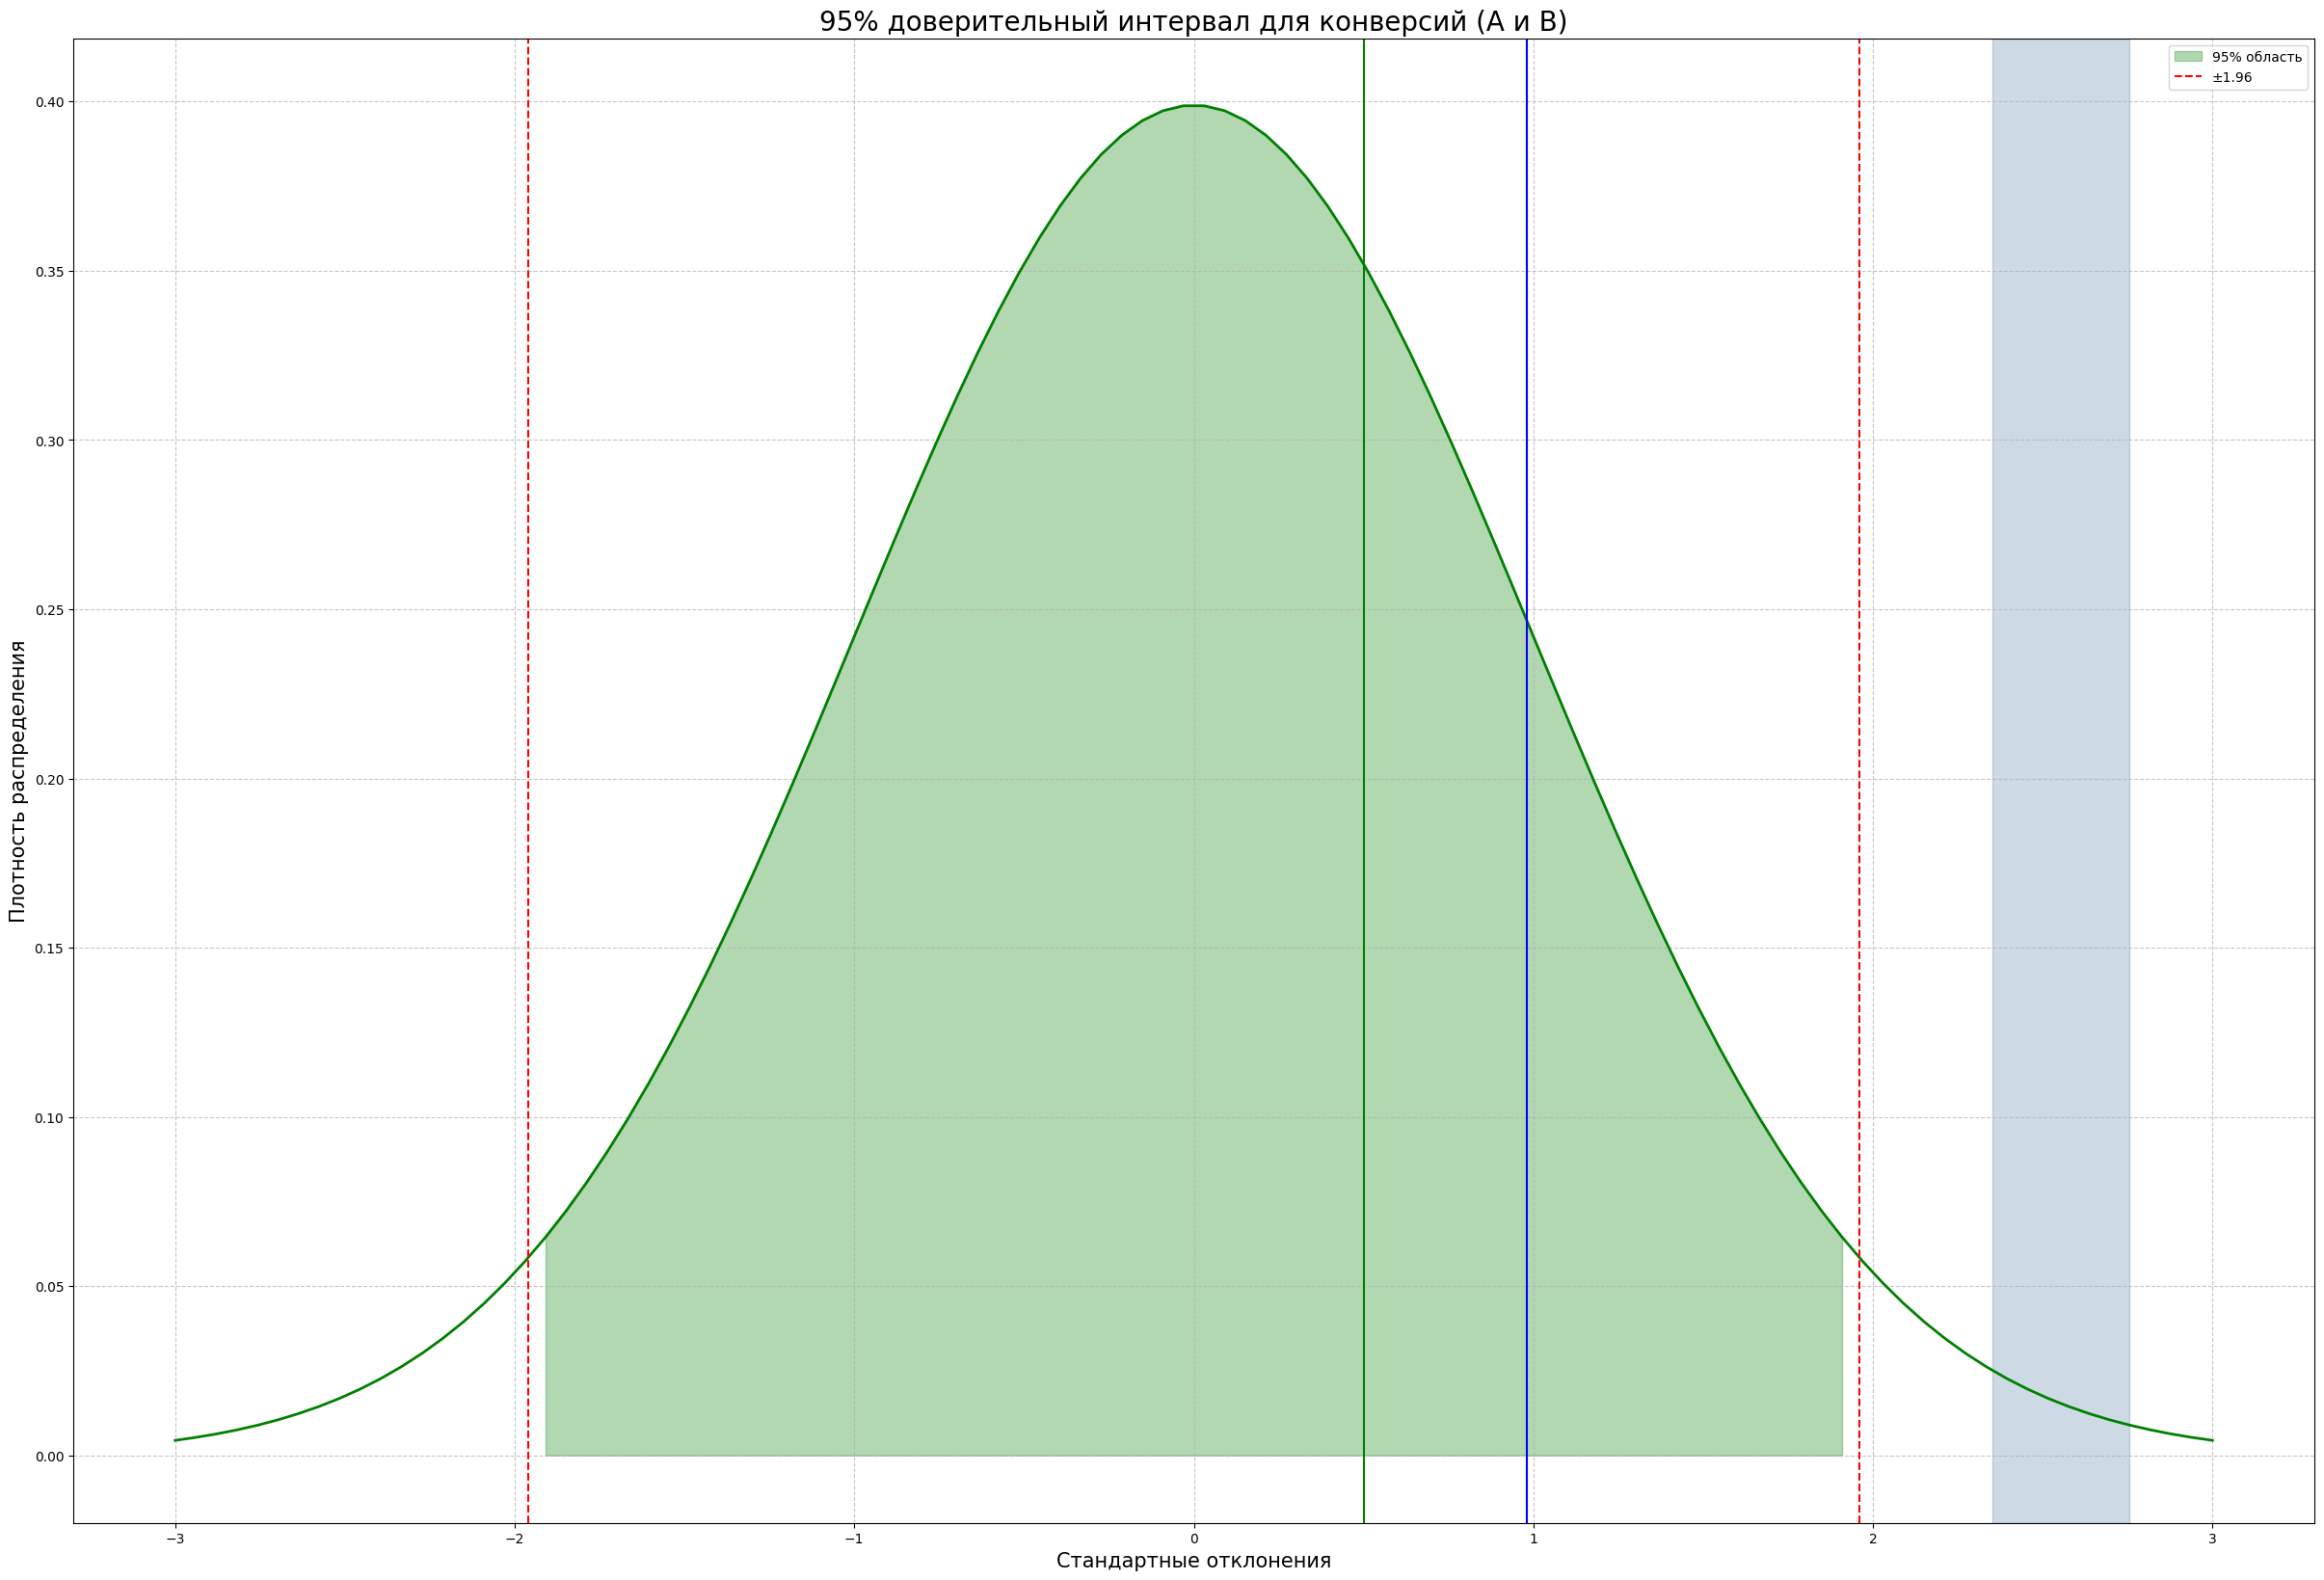

In [51]:
# Создаём заголовок для графика
print('-' * 150)
print('График 95%-го доверительного интервала для конверсий в каждой из групп:')


# Строим график для конверсий
plt.figure(figsize = (30, 20))
plt.plot(x, y, 'g-', lw=2)
plt.fill_between(x, 0, y, where=(x >= -1.96) & (x <= 1.96), color='green', alpha=0.3, label='95% область')
plt.axvline(x=-1.96, color='r', linestyle='--', label='±1.96')
plt.axvline(x=1.96, color='r', linestyle='--')
plt.title('95% доверительный интервал для конверсий (A и B)', fontsize = 20)
plt.xlabel('Стандартные отклонения', fontsize = 15)
plt.ylabel('Плотность распределения', fontsize = 15)
plt.legend()


# Добавляем точки с доверительным интервалом
plt.axvline(x=(p_a * 100 - lower_bound_a * 100) / (upper_bound_a * 100 - lower_bound_a * 100) * 1.96 if upper_bound_a > lower_bound_a else 0, color='blue', linestyle='-', label='A mean')
plt.axvspan(p_a * 100 - (upper_bound_a * 100 - lower_bound_a * 100) / 2, p_a * 100 + (upper_bound_a * 100 - lower_bound_a * 100) / 2, color='blue', alpha=0.1)
plt.axvline(x=(p_b * 100 - lower_bound_b * 100) / (upper_bound_b * 100 - lower_bound_b * 100) if upper_bound_b > lower_bound_b else 0, color='green', linestyle='-', label='B mean')
plt.axvspan(p_b * 100 - (upper_bound_b * 100 - lower_bound_b * 100) / 2, p_b * 100 + (upper_bound_b * 100 - lower_bound_b * 100) / 2, color='green', alpha=0.1)
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.show()

**Интерпретация:**

Доверительные интервалы для группы $A$ и $B$ одинаковы: ($2.353033$%, $2.756279$%). Это указывает на то, что статистически нет различий между конверсиями в группах $A$ и $B$. Если доверительные интервалы пересекаются или идентичны, средние значения конверсий не отличаются на уровне значимости $5$%.

Поскольку доверительные интервалы для обеих групп совпадают, это подтверждает нулевую гипотезу ($H_0$: конверсии равны) и указывает, что разница между конверсиями в группах $A$ и $B$ статистически незначима.

**Вывод:**

График показывает, что $95$% вероятностной массы находится в пределах $±1.96$, что соответствует стандартной методике. Можно сделать вывод, что конверсии в группах $A$ и $B$ статистически равны. Это означает, что нет оснований отвергнуть нулевую гипотезу о равенстве конверсий на уровне значимости $5$%.

---

**Строим доверительный интервал для разницы конверсий в группах:**

In [31]:
# Создаём функцию для расчета 95% доверительного интервала для разницы в группах
def proportion_diff_conf_interval(p1, p2, n1, n2, gamma = 0.95):
    
    # Задаём параметры
    alpha = 1 - gamma                     # уровень значимости
    z_crit = -stats.norm.ppf(alpha / 2)   # z-критическое значение
    diff_p = p1 - p2                      # разница пропорций
    
    # Рассчёт стандартной ошибки разности
    if p1 == 0 or p2 == 0:
        se_diff = np.sqrt((p1 * (1 - p1) / n1 + p2 * (1 - p2) / n2) + 1e-10)
    else:
        se_diff = np.sqrt(p1 * (1 - p1) / n1 + p2 * (1 - p2) / n2)
        
    eps_diff = z_crit * se_diff
    lower_bound = diff_p - eps_diff
    upper_bound = diff_p + eps_diff
    
    return lower_bound, upper_bound




# Рассчитываем доверительный интервал для разницы конверсий
lower_bound_diff, upper_bound_diff = proportion_diff_conf_interval(p_a, p_b, n_a, n_b)
print('Доверительный интервал для разницы конверсий (A - B): {}%'.format((round(lower_bound_diff * 100, 6), round(upper_bound_diff * 100, 6))))
print('-' * 80)

Доверительный интервал для разницы конверсий (A - B): (-0.285137, 0.285137)%
--------------------------------------------------------------------------------


Строим график:

------------------------------------------------------------------------------------------------------------------------------------------------------
График 95%-го доверительного интервала для разницы конверсий в группах:


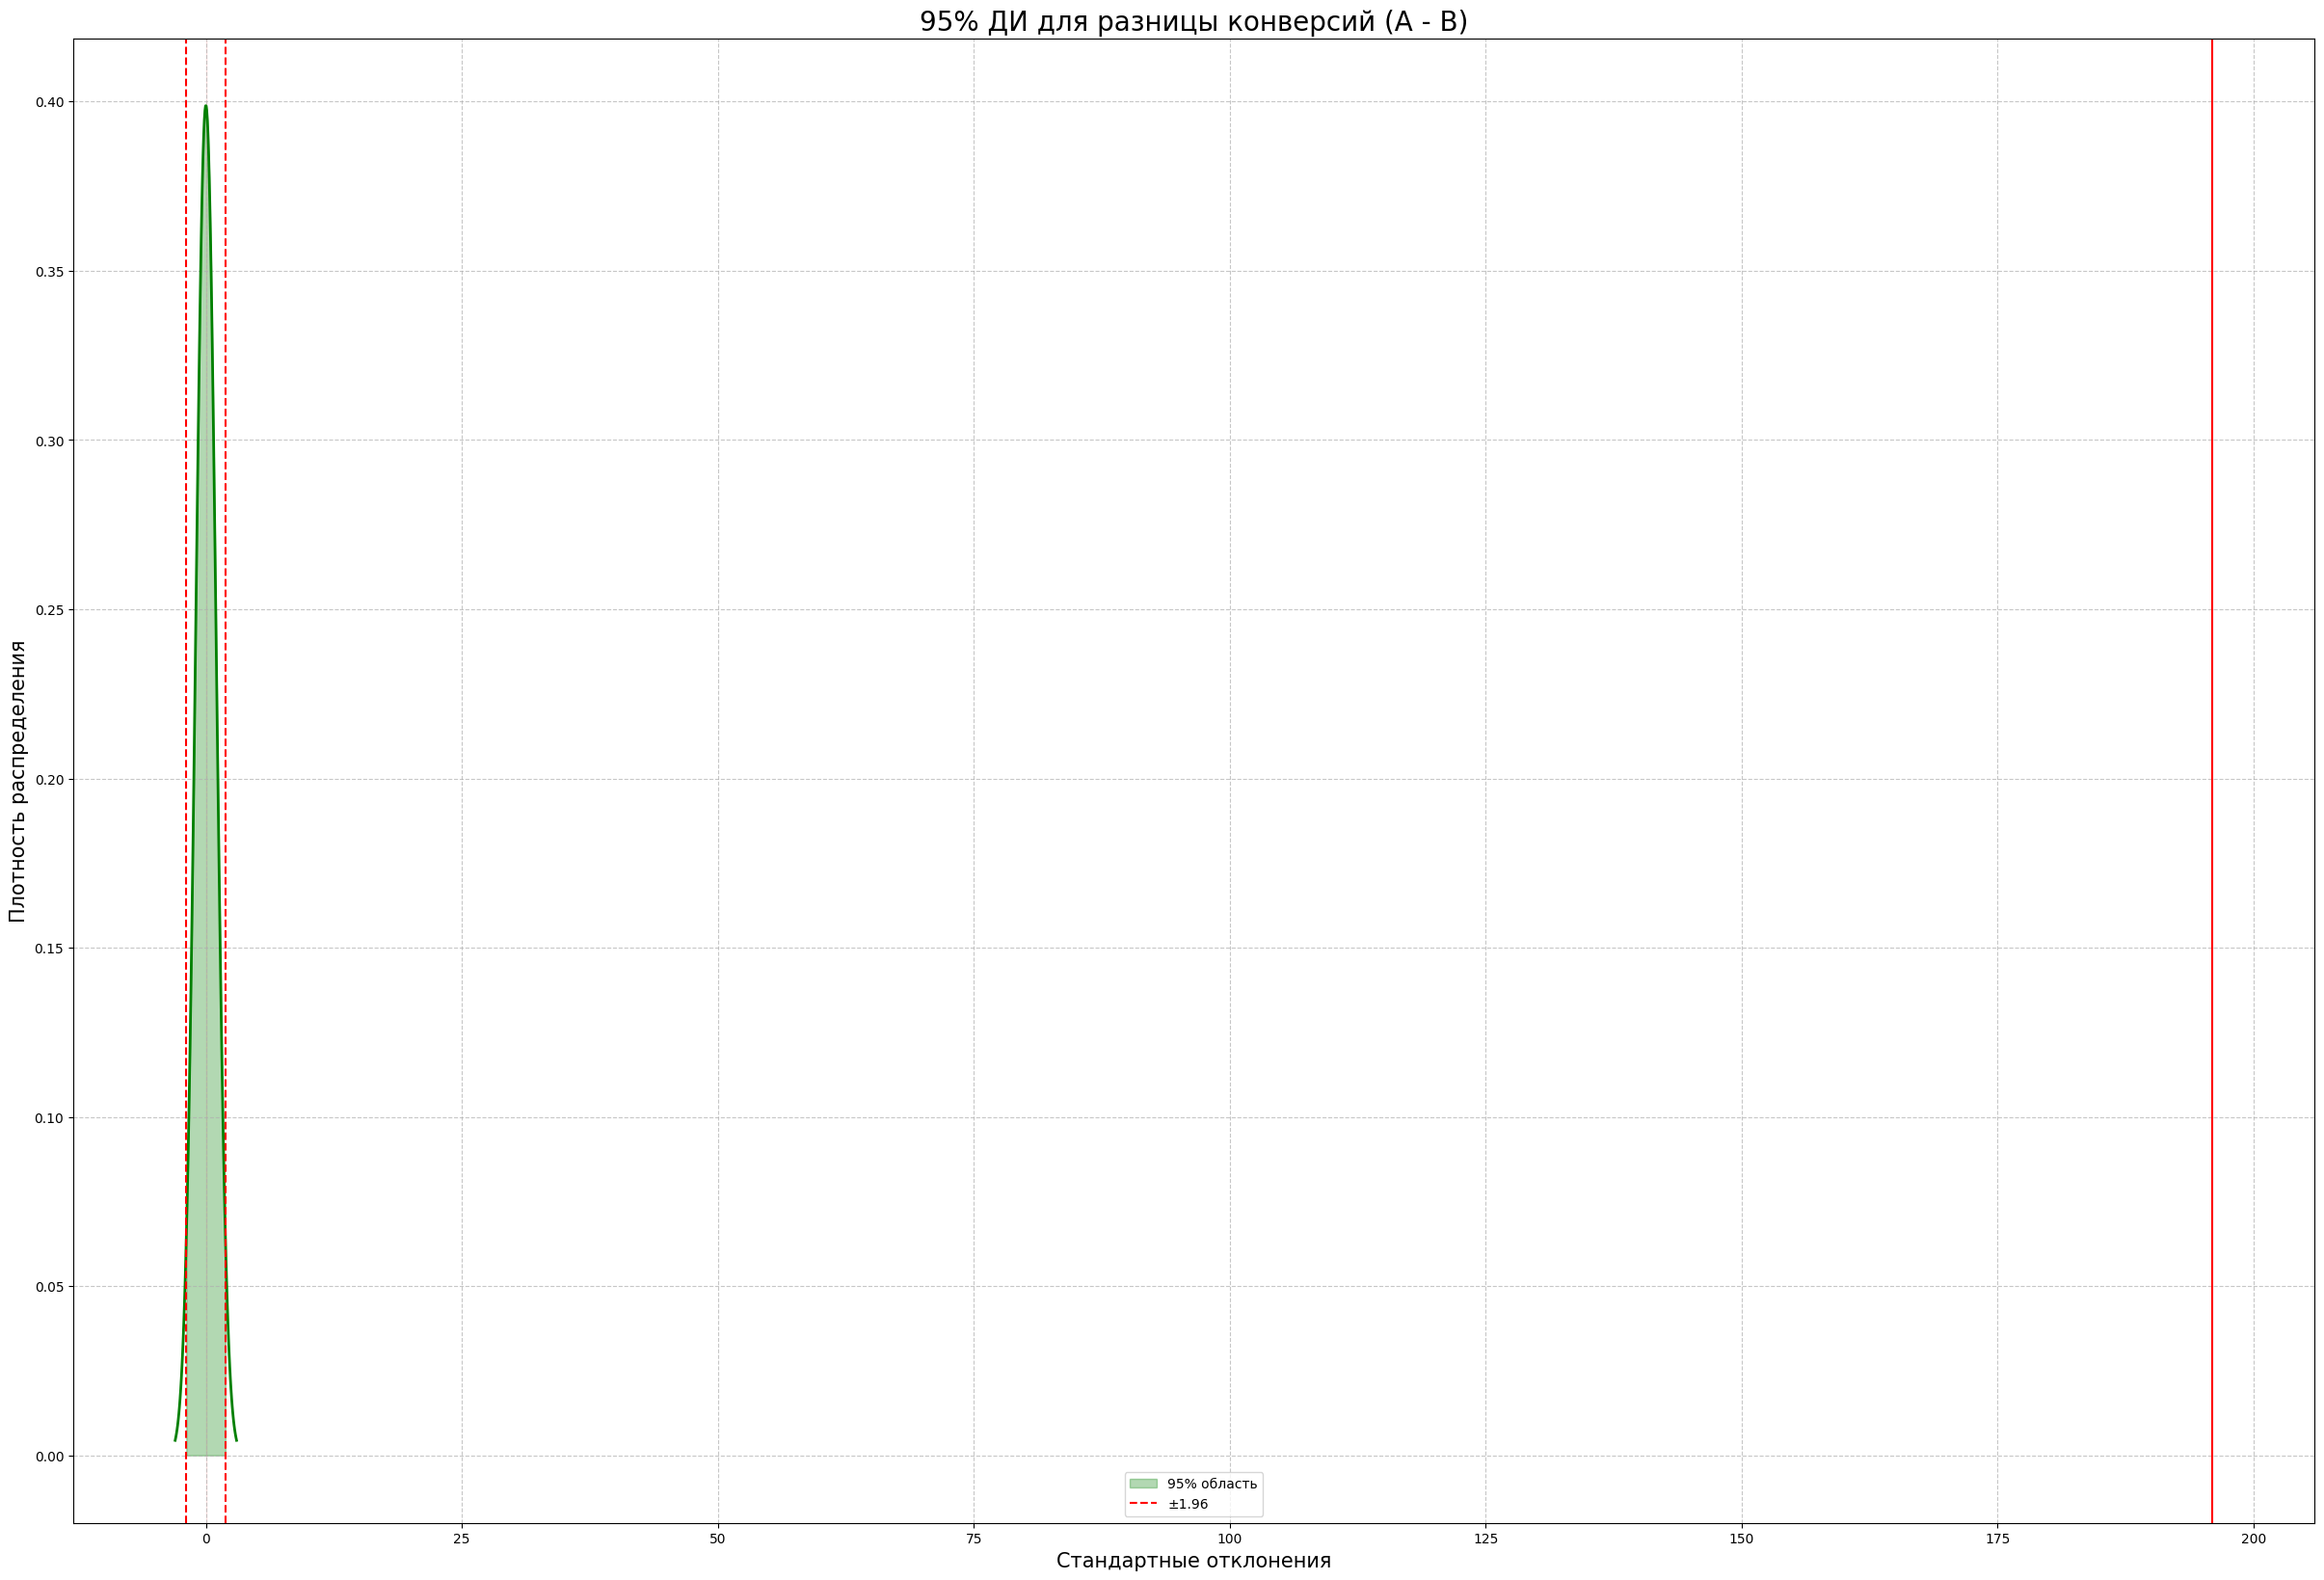

In [53]:
# Создаём заголовок для графика
print('-' * 150)
print('График 95%-го доверительного интервала для разницы конверсий в группах:')



# График для разницы конверсий
plt.figure(figsize=(30, 20))
plt.plot(x, y, 'g-', lw = 2)
plt.fill_between(x, 0, y, where=(x >= -1.96) & (x <= 1.96), color='green', alpha=0.3, label='95% область')
plt.axvline(x=-1.96, color='r', linestyle='--', label='±1.96')
plt.axvline(x=1.96, color='r', linestyle='--')
plt.title('95% ДИ для разницы конверсий (A - B)', fontsize = 20)
plt.xlabel('Стандартные отклонения', fontsize = 15)
plt.ylabel('Плотность распределения', fontsize = 15)
plt.legend()


# Добавляем точки с доверительным интервалом
diff_p = p_a - p_b
diff_mean = (upper_bound_diff - lower_bound_diff) / 2
plt.axvline(x=(diff_p * 100 - lower_bound_diff * 100) / diff_mean * 1.96 if diff_mean > 0 else 0, color='red', linestyle='-', label='Diff mean')
plt.axvspan(diff_p * 100 - diff_mean / 2, diff_p * 100 + diff_mean / 2, color='red', alpha=0.1)
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.show()

**Интерпретация:**

Доверительный интервал ($−0.285137$%,$0.285137$%) включает $0$, что означает, что нулевая гипотеза ($H_0$: разница конверсий = $0$) не может быть отвергнута на уровне значимости $5$%.

**Вывод:**

Данный график показывает нормальное распределение с $95$% областью. Он так же подтверждает симметрию доверительного интервала относительно $0$, что соответствует отсутствию значимости.

---

**Строим доверительный интервал для среднего количества увиденной рекламы в группах А и B:**

In [34]:
# Создаём функцию для расчета 95% доверительного интервала для среднего значения
def mean_conf_interval(x, gamma = 0.95):
    
    # Задаём параметры
    alpha = 1 - gamma                       # уровень значимости
    z_crit = -stats.norm.ppf(alpha / 2)     # z-критическое значение
    mean = x.mean()                         # среднее значение
    se_mean = x.std() / np.sqrt(len(x))     # cтандартная ошибка среднего
    lower_bound = mean - z_crit * se_mean   # нижняя граница доверительного интервала
    upper_bound = mean + z_crit * se_mean   # верхняя граница доверительного интервала
    
    return lower_bound, upper_bound




# Рассчёт среднего для группы A
lower_bound_mean_a, upper_bound_mean_a = mean_conf_interval(ad_group['total ads'])
print('Доверительный интервал для среднего количества рекламы группы A (ad): [{:.6f}, {:.6f}]'.format(lower_bound_mean_a, upper_bound_mean_a))
print('-' * 95)


# Рассчёт среднего для группы B
lower_bound_mean_b, upper_bound_mean_b = mean_conf_interval(psa_group['total ads'])
print('Доверительный интервал для среднего количества рекламы группы B (psa): [{:.6f}, {:.6f}]'.format(lower_bound_mean_b, upper_bound_mean_b))
print('-' * 95)

Доверительный интервал для среднего количества рекламы группы A (ad): [24.709243, 24.937487]
-----------------------------------------------------------------------------------------------
Доверительный интервал для среднего количества рекламы группы B (psa): [24.213426, 25.308849]
-----------------------------------------------------------------------------------------------


Строим график:

------------------------------------------------------------------------------------------------------------------------------------------------------
График 95%-го доверительного интервала для среднего количества увиденной рекламы в группах А и B:


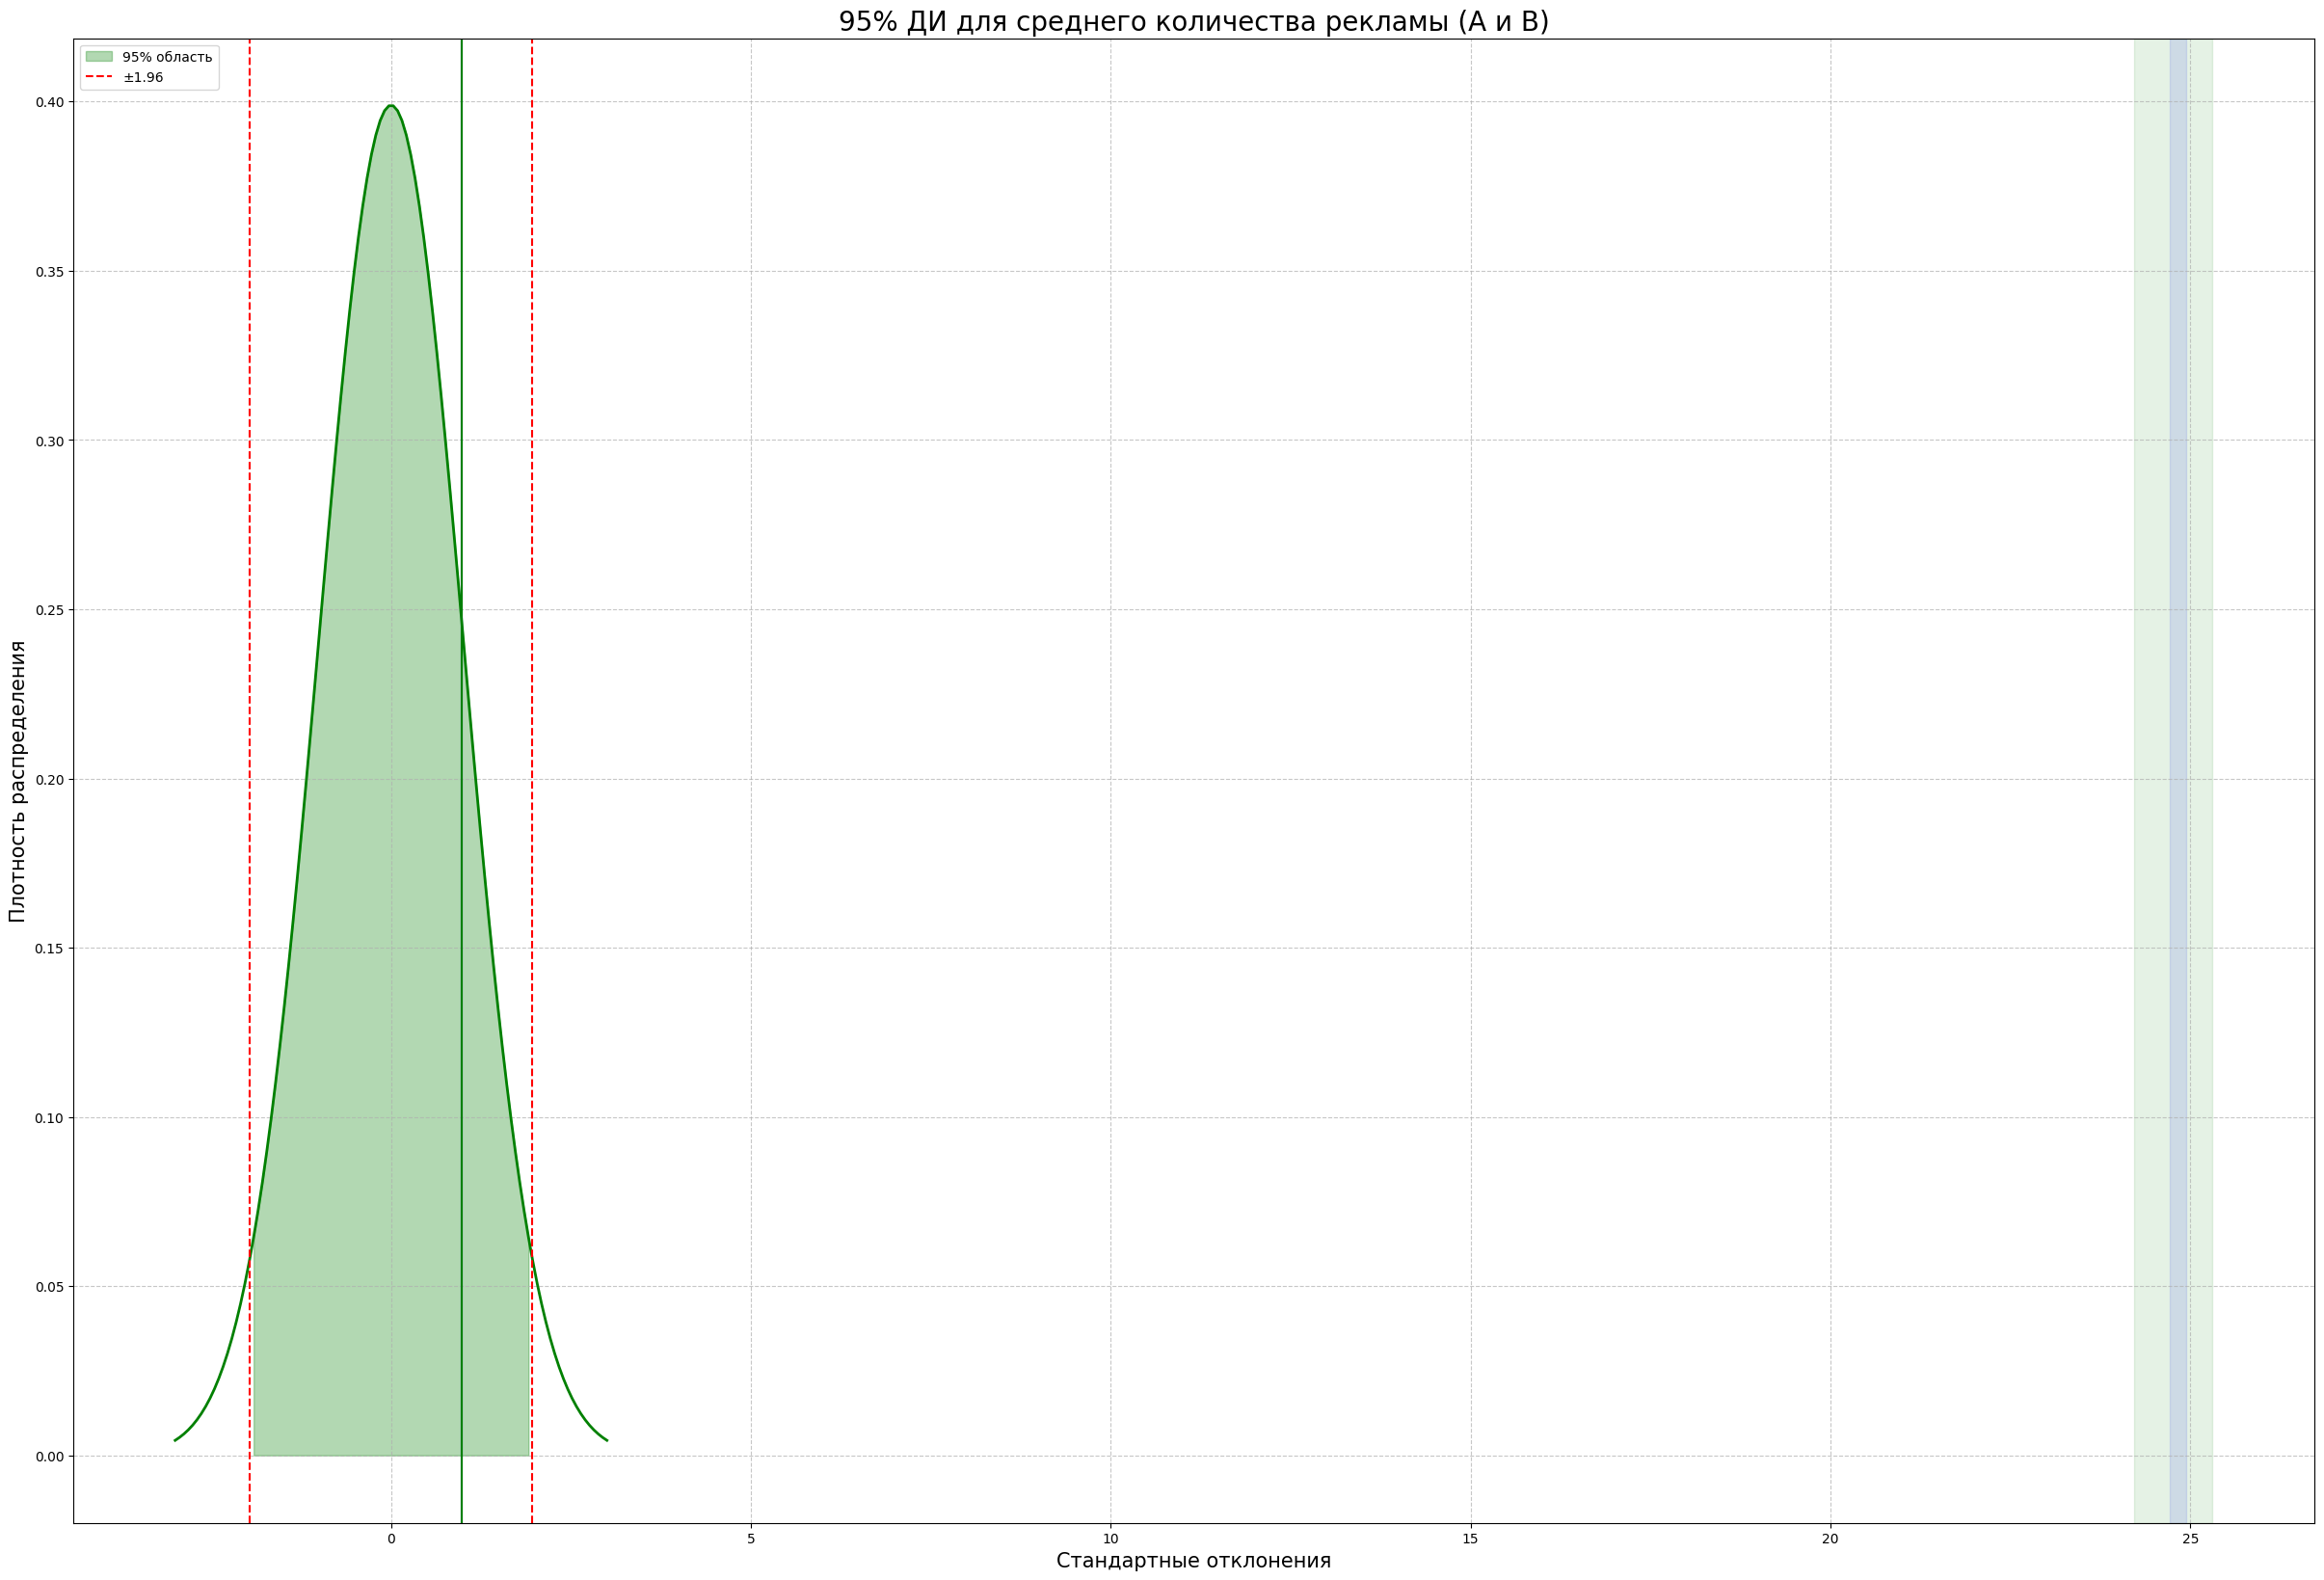

In [55]:
# Создаём заголовок для графика
print('-' * 150)
print('График 95%-го доверительного интервала для среднего количества увиденной рекламы в группах А и B:')


# График для среднего количества рекламы
plt.figure(figsize = (30, 20))
plt.plot(x, y, 'g-', lw=2)
plt.fill_between(x, 0, y, where=(x >= -1.96) & (x <= 1.96), color='green', alpha=0.3, label='95% область')
plt.axvline(x=-1.96, color='r', linestyle='--', label='±1.96')
plt.axvline(x=1.96, color='r', linestyle='--')
plt.title('95% ДИ для среднего количества рекламы (A и B)', fontsize = 20)
plt.xlabel('Стандартные отклонения', fontsize = 15)
plt.ylabel('Плотность распределения', fontsize = 15)
plt.legend()



# Добавляем точки с доверительным интервалом
mean_a = ad_group['total ads'].mean()
mean_a_diff = upper_bound_mean_a - lower_bound_mean_a
plt.axvline(x=(mean_a - lower_bound_mean_a) / mean_a_diff * 1.96 if mean_a_diff > 0 else 0, color='blue', linestyle='-', label='A mean')
plt.axvspan(lower_bound_mean_a, upper_bound_mean_a, color='blue', alpha=0.1)


mean_b = psa_group['total ads'].mean()
mean_b_diff = upper_bound_mean_b - lower_bound_mean_b
plt.axvline(x=(mean_b - lower_bound_mean_b) / mean_b_diff * 1.96 if mean_b_diff > 0 else 0, color='green', linestyle='-', label='B mean')
plt.axvspan(lower_bound_mean_b, upper_bound_mean_b, color='green', alpha=0.1)
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.show()

**Интерпретация:**

Доверительные интервалы для $A$ ([$24.709243$, $24.937487$]) и $B$ ([$24.213426$, $25.308849$]) пересекаются (например, около $24.709–24.937$). Это подтверждает, что нет статистически значимой разницы между средним количеством рекламы в группах $A$ и $B$, что согласуется с результатом **t-теста Уэлча** ($p = 0.83$).

Узкий интервал для $A$ объясняется большим размером выборки ($587399$), что уменьшает стандартную ошибку.

**Вывод:**

Средние значения ($24.80588$ для $A$ и $24.76197$ для $B$) очень близки, и их доверительные интервалы перекрываются, что говорит о том, что пользователи в обеих группах видели примерно одинаковое количество рекламы (разница около $0.04391$ незначима).

---

## <CENTER> **`5.` Общий вывод**

На данном этапе мы сделаем общиц вывод, а так же приведём обоснованные ответы на бизнес-вопрос: «Насколько успех рекламной кампании обоснован именно рекламой?».

Среднее количество рекламы ($24.823365$ для $A$ и $24.761138$ для $B$) практически одинаково, и доверительные интервалы пересекаются. Это означает, что объем рекламы, увиденной пользователями, не различается, и эффект конверсии связан с типом рекламы (коммерческая против социальной), а не с количеством показов.

Разница в конверсиях ($0.769245$%) значима для бизнеса: из $564577$ посещений группы $A$ было $14423$ покупки, а из $23524$ посещений группы $B$ — $420$ покупок. Это дает потенциальный прирост конверсии, связанный с рекламой. Однако конверсии ($2.55$% и $1.79$%) относительно низкие, и успех кампании зависит от затрат. Если затраты на рекламу оправдывают $14423$ покупки, кампания успешна.

**Насколько успех обоснован рекламой?**

спех рекламной кампании в группе $A$ (конверсия $2.554656$%) по сравнению с группой $B$ ($1.785411$%) обоснован именно коммерческой рекламой. Статистически значимая разница в конверсиях ($𝑝 < 0.0001$, доверительный интервал [$0.5975$%, $0.9409$%]) подтверждает, что реклама в группе $A$ привела к дополнительным $0.769245$% покупок. Поскольку среднее количество рекламы не отличается ($𝑝 ≈ 0.83$), эффект обусловлен типом рекламы (коммерческая против социальной), а не ее объемом.

Кампания успешна с точки зрения увеличения конверсий ($14423$ покупки против $420$), но эффективность ($2.55$%) зависит от затрат. Для окончательного вывода рекомендуется:

   1. Рассчитать $ROI$, сравнив затраты на рекламу с доходом от $14423$ покупок,
   2. Оптимизировать кампанию, чтобы увеличить конверсию выше $2.55$% (например, улучшить таргетинг или креативы),
   3. Изучить распределение `total ads`, чтобы понять, как частота или время показа влияют на результат.